In [1]:
%matplotlib inline
from preamble import *

### 2.3.6 Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Data shape: (100, 2)
Target shape: (100,)


In [78]:
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

- RandomForestClassifier
  - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  - 각 트리에 대해 독립적인 bootstrap sample 생성
    - bootstrap samples
      - n_samples 개의 데이터 포인트 중에서 무작위로 n_samples 개의 데이터를 추출 (하나의 샘플이 중복되어 추출 가능)
  - n_estimators
    - 생성할 트리의 개수    
  - max_features
    - 각 트리 노드에서 후보 특성을 무작위로 선정
    - 그러한 선정 작업시에 몇 개의 특성까지 선정할지를 결정함
    - 후보 특성을 선정하는 작업은 매 노드마다 반복 --> 각 노드는 서로 다른 후보 특성을 사용하게 됨
    - max_features를 n_features로 설정하면 각 노드에서 모든 특성을 고려 --> 무작위성이 줄어들게 됨
    - max_features를 1로 설정하면 각 노드에서 선택된 특성의 임계값만으로 분기 --> 트리의 깊이가 깊어짐
    - 기본값: auto
      - RandomForestClassifier: sqrt(n_features)
      - RandomForestRegressor: n_features
  - n_jobs
    - 사용할 CPU 코어 수 지정
    - n_jobs = -1 로 지정하면 컴퓨터의 모든 코어 사용
  - random_state
    - 서로 다른 random_state에 대해 전혀 다른 트리들이 생성
  - max_depth
    - 사전 가지치기 옵션
  - min_samples_split: int, float, optional (default=2)
    - The minimum number of samples required to split an internal node:
    - If int, then consider min_samples_split as the minimum number.
    - If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [79]:
mat = np.ones((2,3))
print(mat.shape)
print(mat)

print()

mat2 = mat.ravel()
print(mat2.shape)
print(mat2)

(2, 3)
[[ 1.  1.  1.]
 [ 1.  1.  1.]]

(6,)
[ 1.  1.  1.  1.  1.  1.]


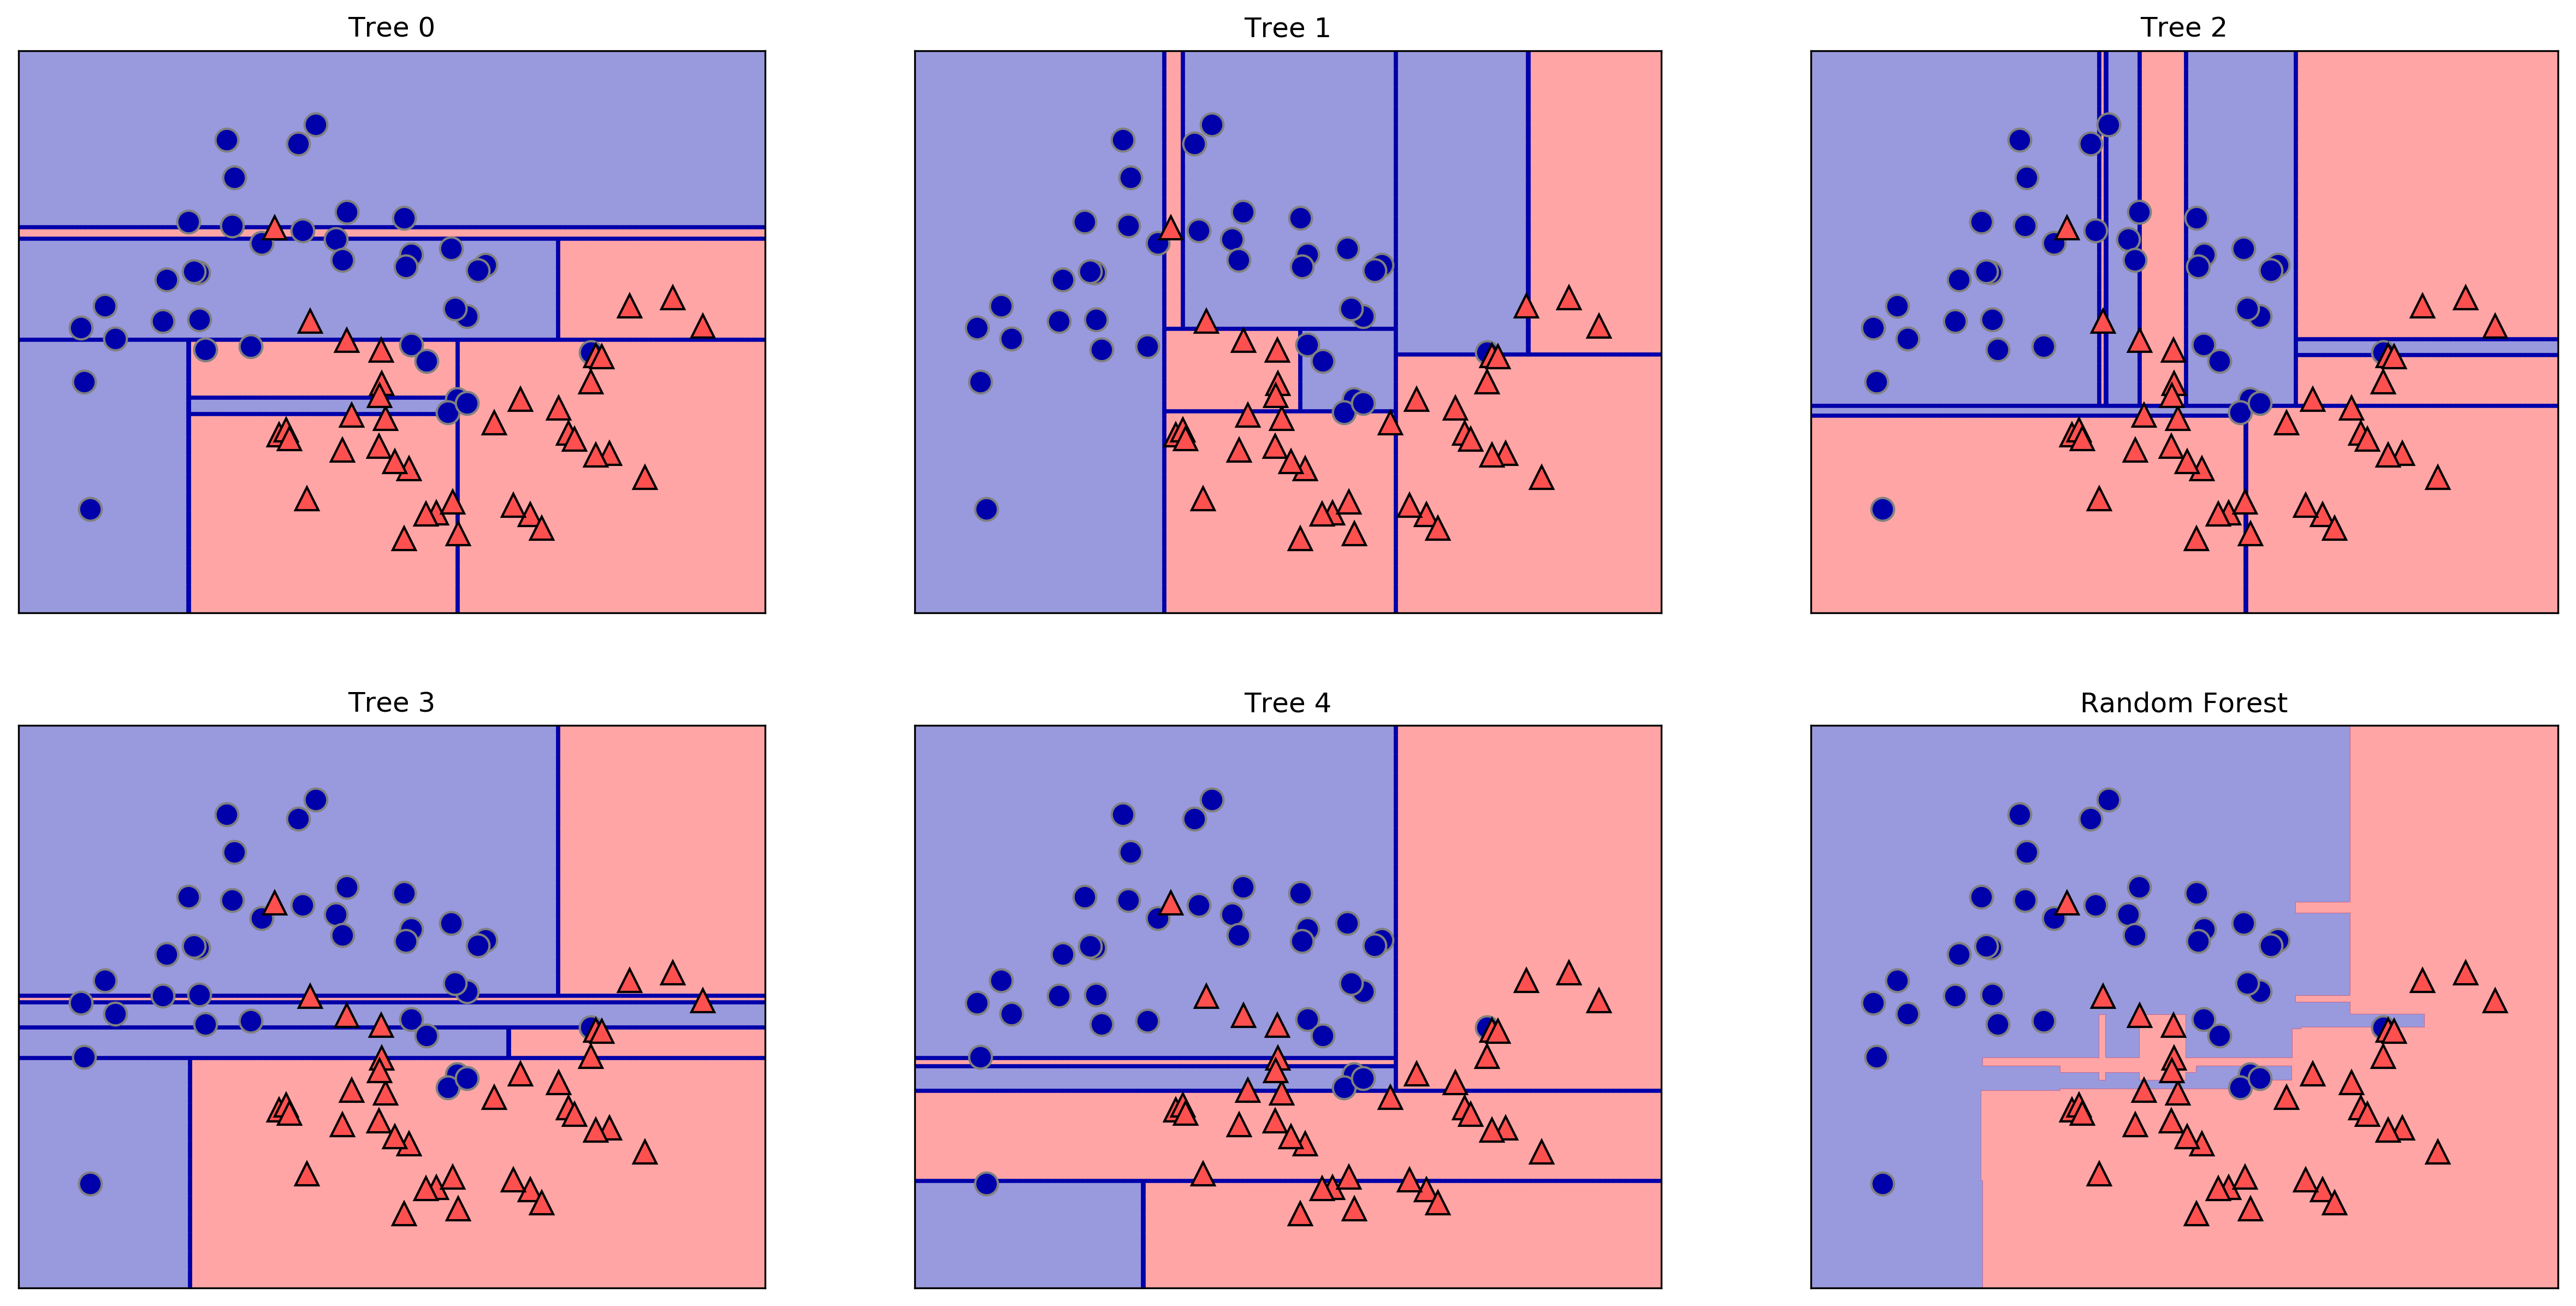

In [80]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


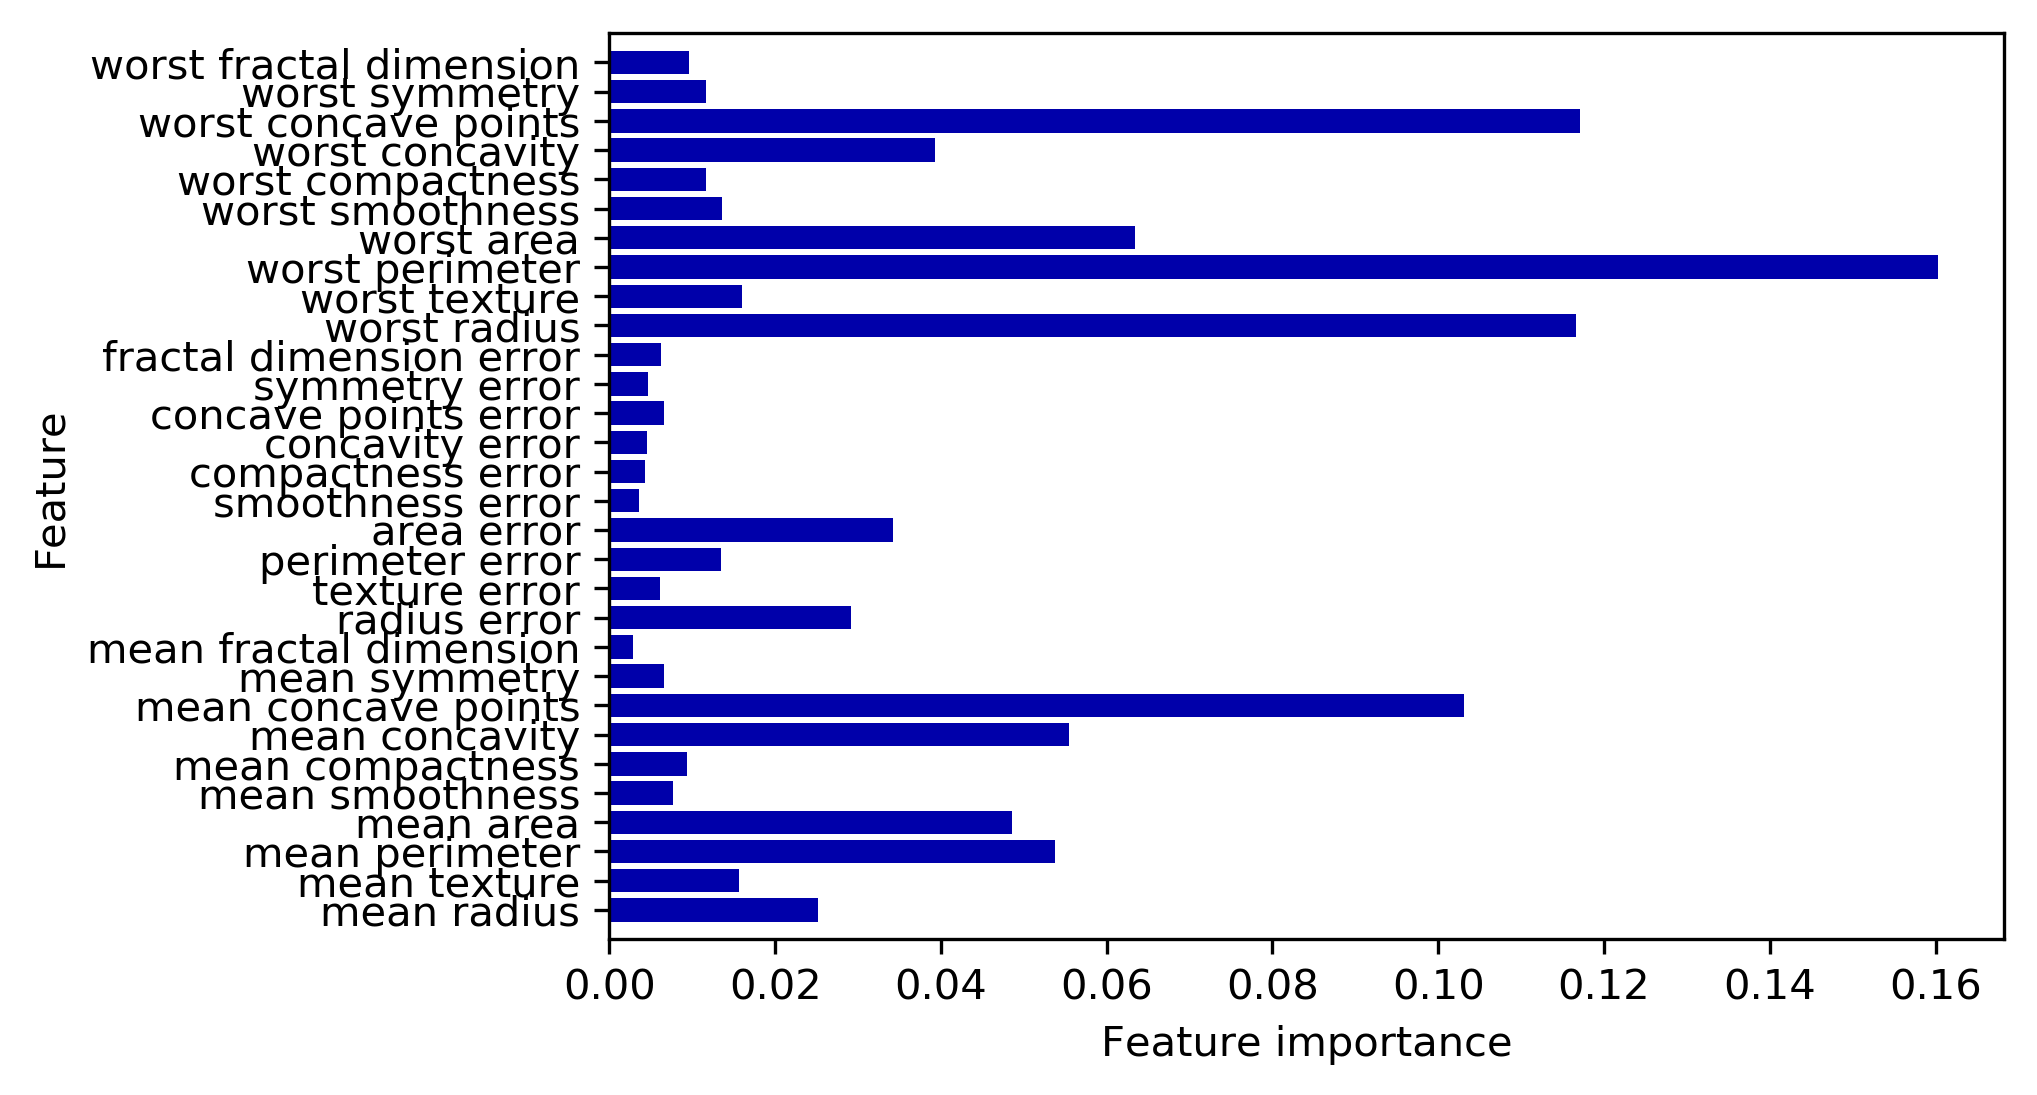

In [82]:
plot_feature_importances_cancer(forest)

- 랜덤 포레스트를 만드는 무작위성
  - 알고리즘이 가능성 있는 많은 경우를 고려할 수 있게 해줌
  - 단일 트리 방식보다 더 넓은 시각으로 데이터를 바라볼 수 있게 해줌

###### Strengths, weaknesses, and parameters
- 랜던 포레스트는 회귀와 분류에 있어서 가장 널리 사용되는 머신러닝 알고리즘
- 대부분의 경우에 있어서 성능이 뛰어나고 매개변수 튜닝없이도 잘 작동
- 데이터 feature개수가 많지만 (차원이 높고) 희소한 데이터에서는 성능이 낮음
- 선형 모델보다 속도가 느리고 더 많은 메모리 사용
- 가용한 시간과 메모리가 허용하는 한 n_estimators는 클수록 좋음 --> 더 많은 트리 사용

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)
- 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 구성
- 기본적으로 무작위성이 없음 
- 강력한 사전 가지치기 사용
  - 1~5 레벨 정도의 깊지 않은 트리 구성
  - 메모리를 적게 사용하고 예측도 빠름
- 많은 개수의 Weak Learner (얕은 트리의 간단한 모델)를 활용
- 주요 파라미터: learning_rate, n_estimators
  - learning_rate가 크면 이전 트리의 보정을 강하게 하기 때문에 더 복잡한 모델을 구성하게 됨.
  - n_estimators 값을 키워서 앙상블 내에 트리의 개수를 증가시키는 것이 좋음.

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


- GradientBoostingClassifier 파라미터 기본값
  - max_depth=3 (트리 깊이 3)
  - n_estimators = 100 (트리 100개)
  - learning_rate = 0.1

In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [85]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


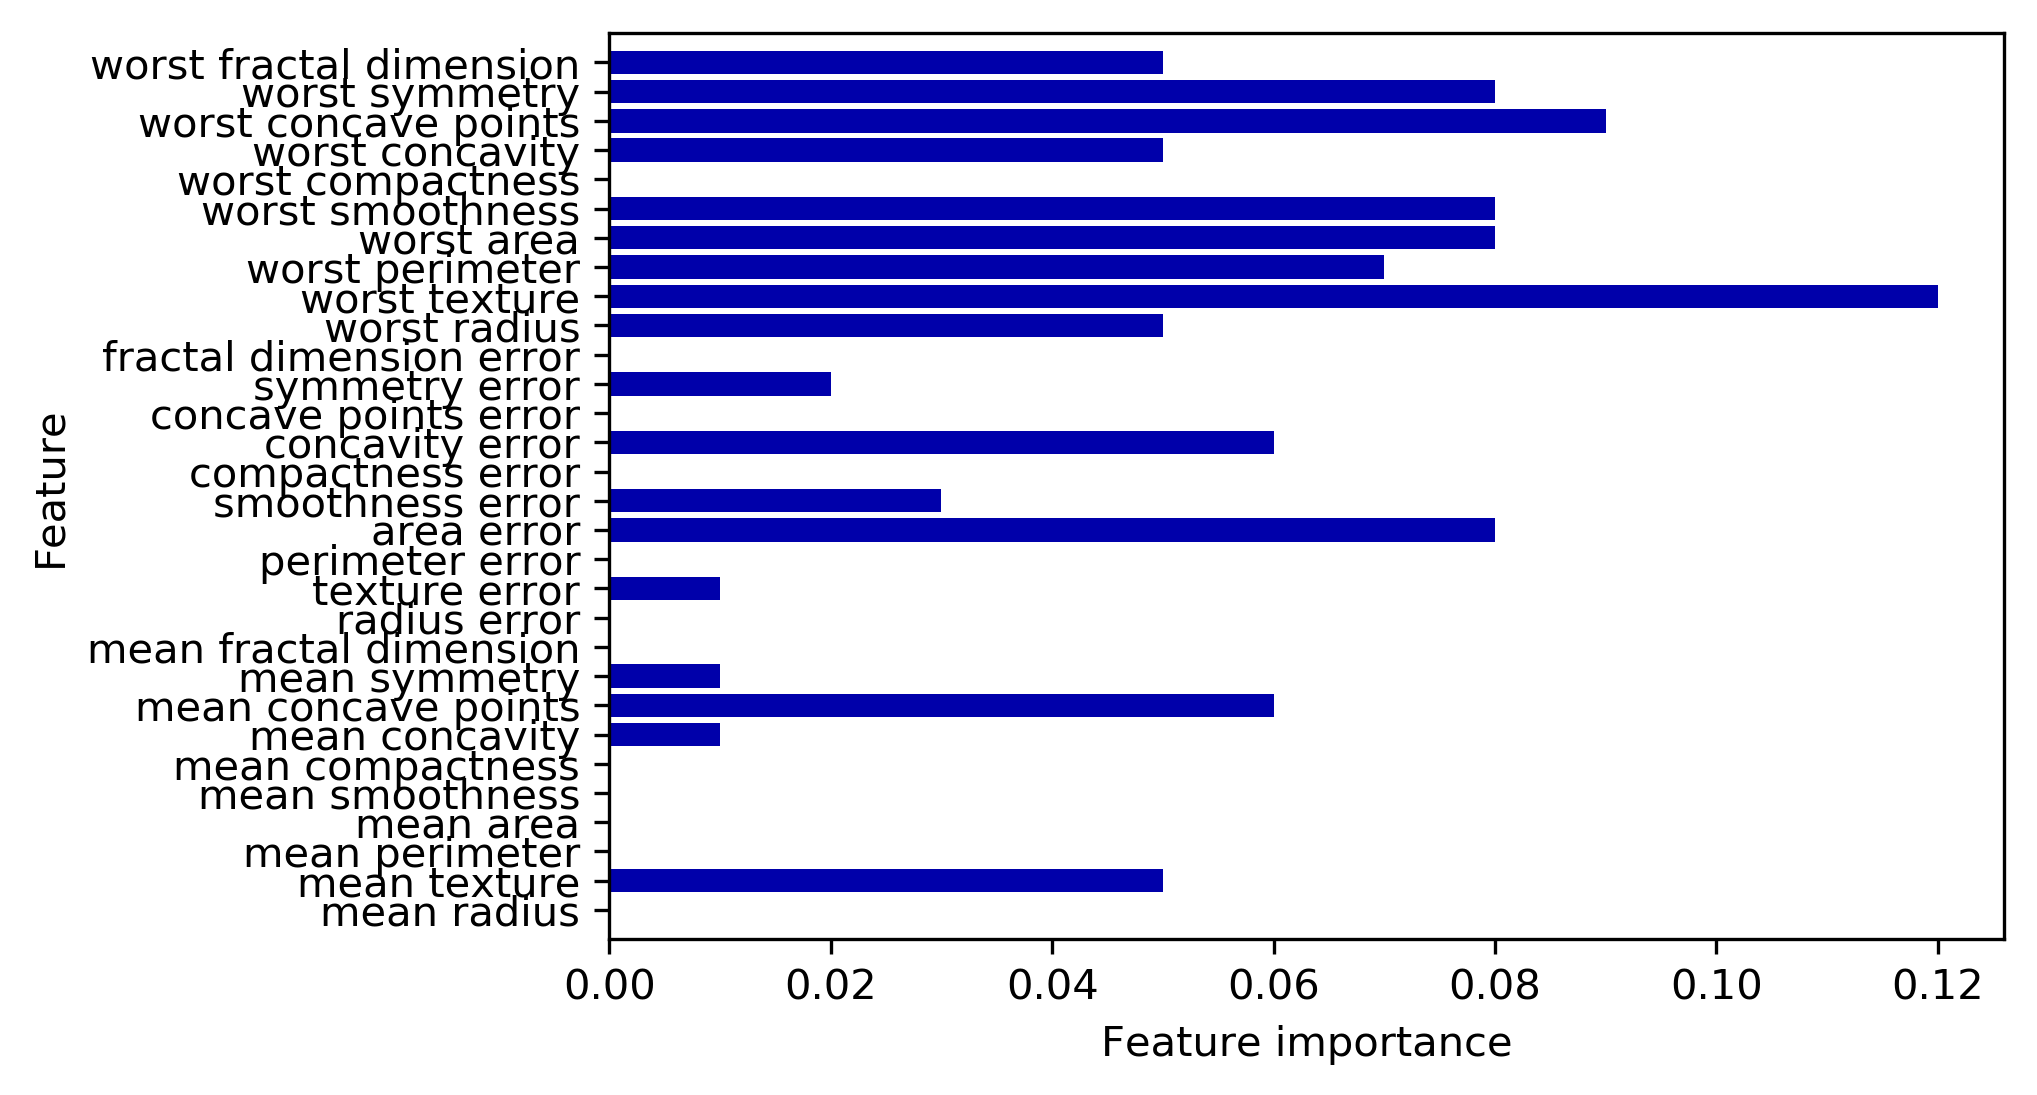

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

- GradientBoostingClassifier에서는 일부 특성이 종종 완전히 무시됨

##### Strengths, weaknesses and parameters
- GradientBoostingClassifier 방법
  - 지도학습에서 가장 강력하고 널리 사용되는 모델 중 하나
  - 단점
    - 매개변수 조정 필요
    - 훈련시간이 다소 길다.
    - 특성들에 대해 희소한 고차원 데이터에서 잘 작동하지 않음
<!-- more -->
<br/><br/>
- xgboost (https://xgboost.readthedocs.io) 사용 검토 필요
  - 대용량 분산 처리 지원
  - GPU 활용 플러그인 지원

### 2.3.7 Kernelized Support Vector Machines
#### Linear Models and Non-linear Features

Text(0,0.5,'Feature 1')

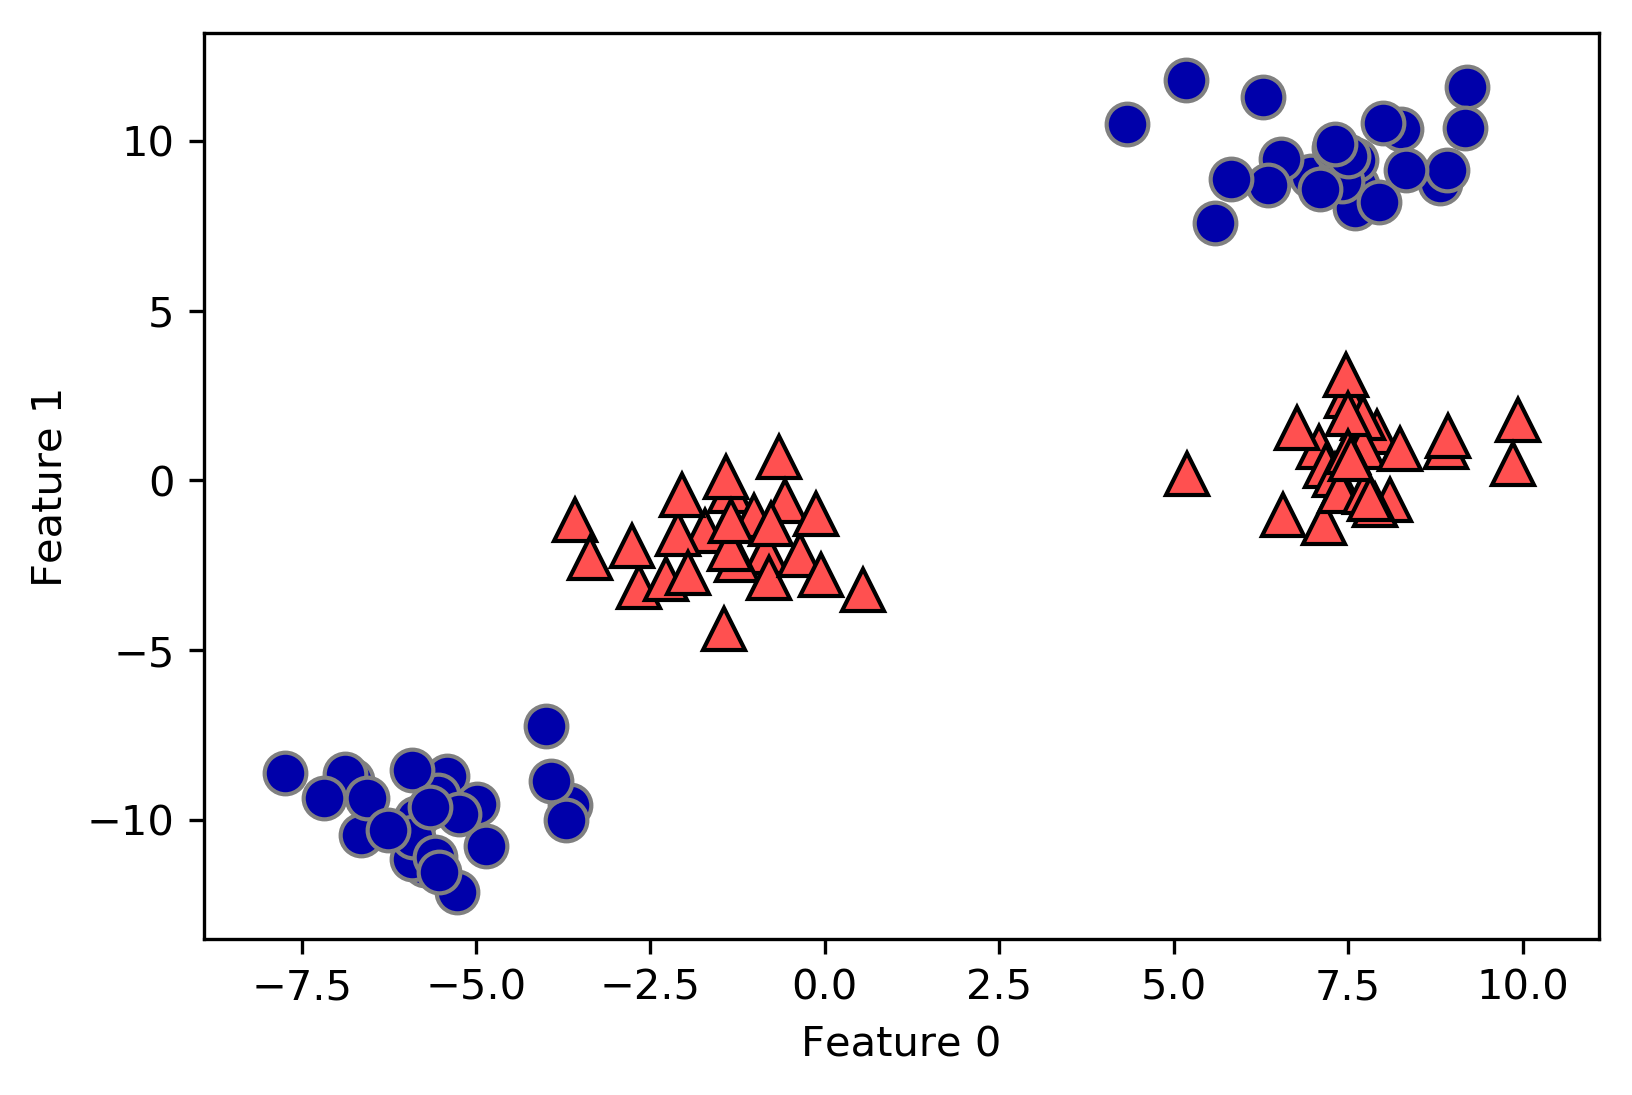

In [87]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

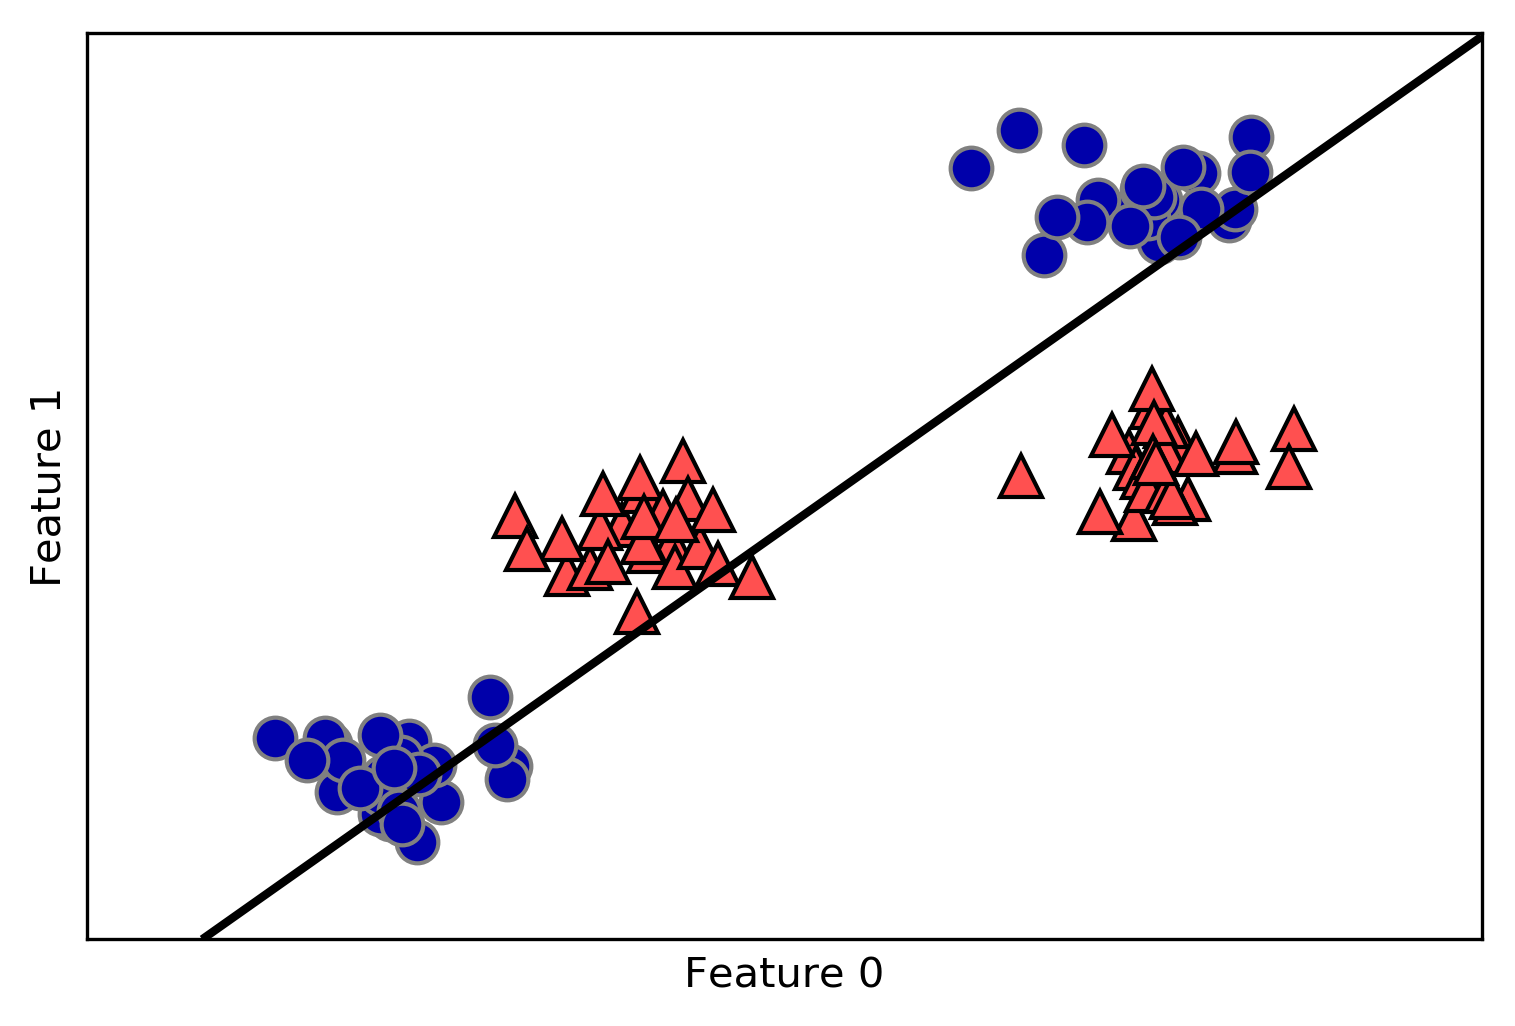

In [88]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 원본 데이터셋에 비선형 특성을 추가하여 선형모델(LinearSVC)을 그대로 사용하는 방법

In [89]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
print("X - Data shape: {}".format(X.shape))
print(X[0])
print(X[1])
print(X[2])
print()

print("X_new - Data shape: {}".format(X_new.shape))
print(X_new[0])
print(X_new[1])
print(X_new[2])

X - Data shape: (100, 2)
[-1.722 -1.48 ]
[-3.657 -9.548]
[ 7.078  0.995]

X_new - Data shape: (100, 3)
[-1.722 -1.48   2.191]
[ -3.657  -9.548  91.169]
[ 7.078  0.995  0.99 ]


Text(0.5,0,'feature1 ** 2')

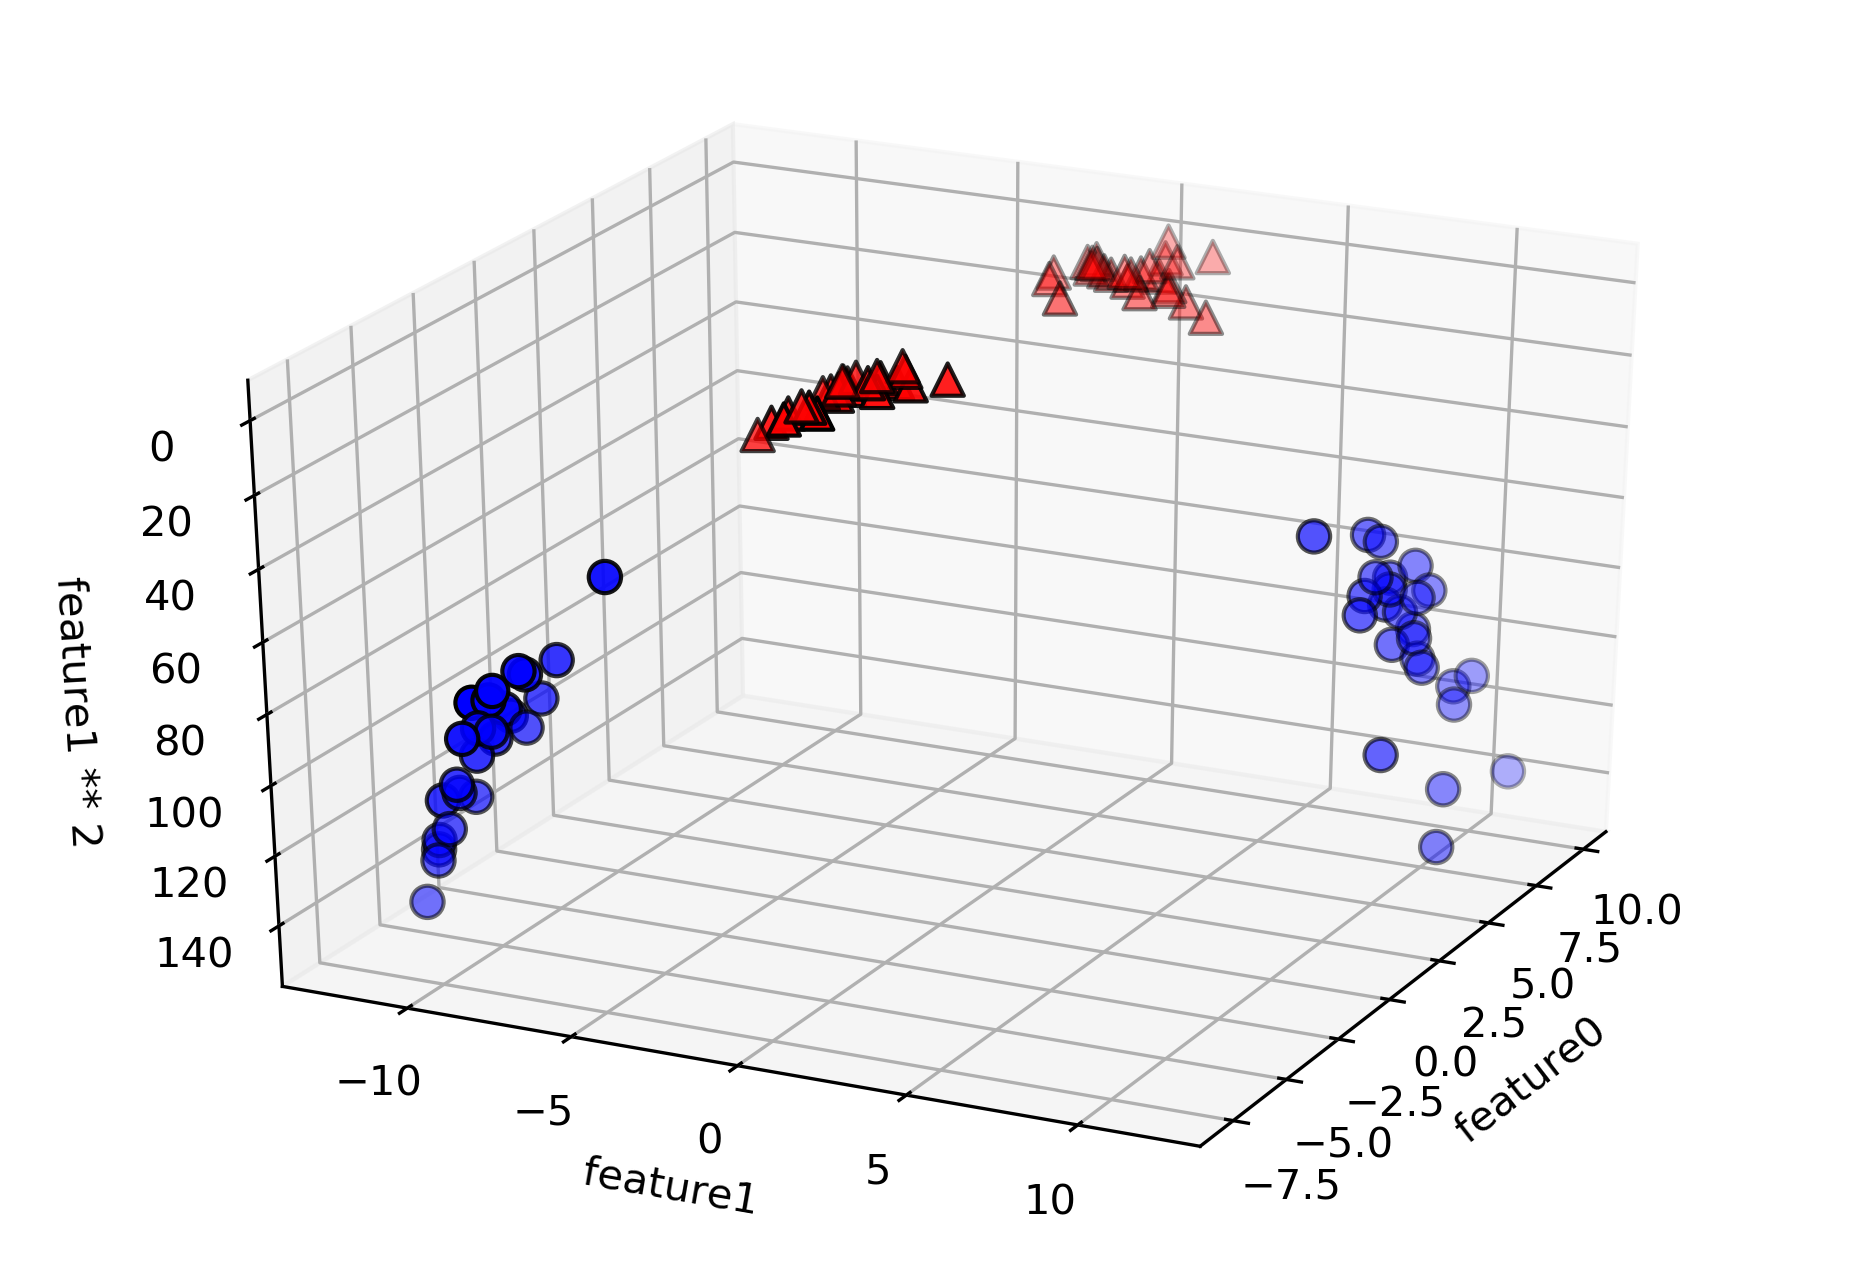

In [90]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [91]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
print("coef shape:", coef.shape)
print(coef)
print("intercept shape:", intercept.shape)
print(intercept)

coef shape: (3,)
[ 0.115 -0.193 -0.057]
intercept shape: (1,)
[ 1.153]


In [137]:
# show linear decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
print("xx shape:", xx.shape)
print("yy shape:", xx.shape)
print(xx[0], xx[1], "...", xx[-1])
print(yy[0], yy[1], "...", yy[-1])

print()

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
print("XX shape:", XX.shape)
print("YY shape:", YY.shape)
print("ZZ shape:", ZZ.shape)
print(XX[0])
print(XX[1])
print(XX[-1])

print(YY[0])
print(YY[1])
print(YY[-1])

xx shape: (50,)
yy shape: (50,)
-9.7406465808 -9.29840934402 ... 11.9289780217
-14.1188069772 -13.549430354 ... 13.7806475598

XX shape: (50, 50)
YY shape: (50, 50)
ZZ shape: (50, 50)
[ -9.741  -9.298  -8.856  -8.414  -7.972  -7.529  -7.087  -6.645  -6.203
  -5.761  -5.318  -4.876  -4.434  -3.992  -3.549  -3.107  -2.665  -2.223
  -1.78   -1.338  -0.896  -0.454  -0.011   0.431   0.873   1.315   1.758
   2.2     2.642   3.084   3.526   3.969   4.411   4.853   5.295   5.738
   6.18    6.622   7.064   7.507   7.949   8.391   8.833   9.276   9.718
  10.16   10.602  11.045  11.487  11.929]
[ -9.741  -9.298  -8.856  -8.414  -7.972  -7.529  -7.087  -6.645  -6.203
  -5.761  -5.318  -4.876  -4.434  -3.992  -3.549  -3.107  -2.665  -2.223
  -1.78   -1.338  -0.896  -0.454  -0.011   0.431   0.873   1.315   1.758
   2.2     2.642   3.084   3.526   3.969   4.411   4.853   5.295   5.738
   6.18    6.622   7.064   7.507   7.949   8.391   8.833   9.276   9.718
  10.16   10.602  11.045  11.487  11.929]
[ 

Text(0.5,0,'feature1 ** 2')

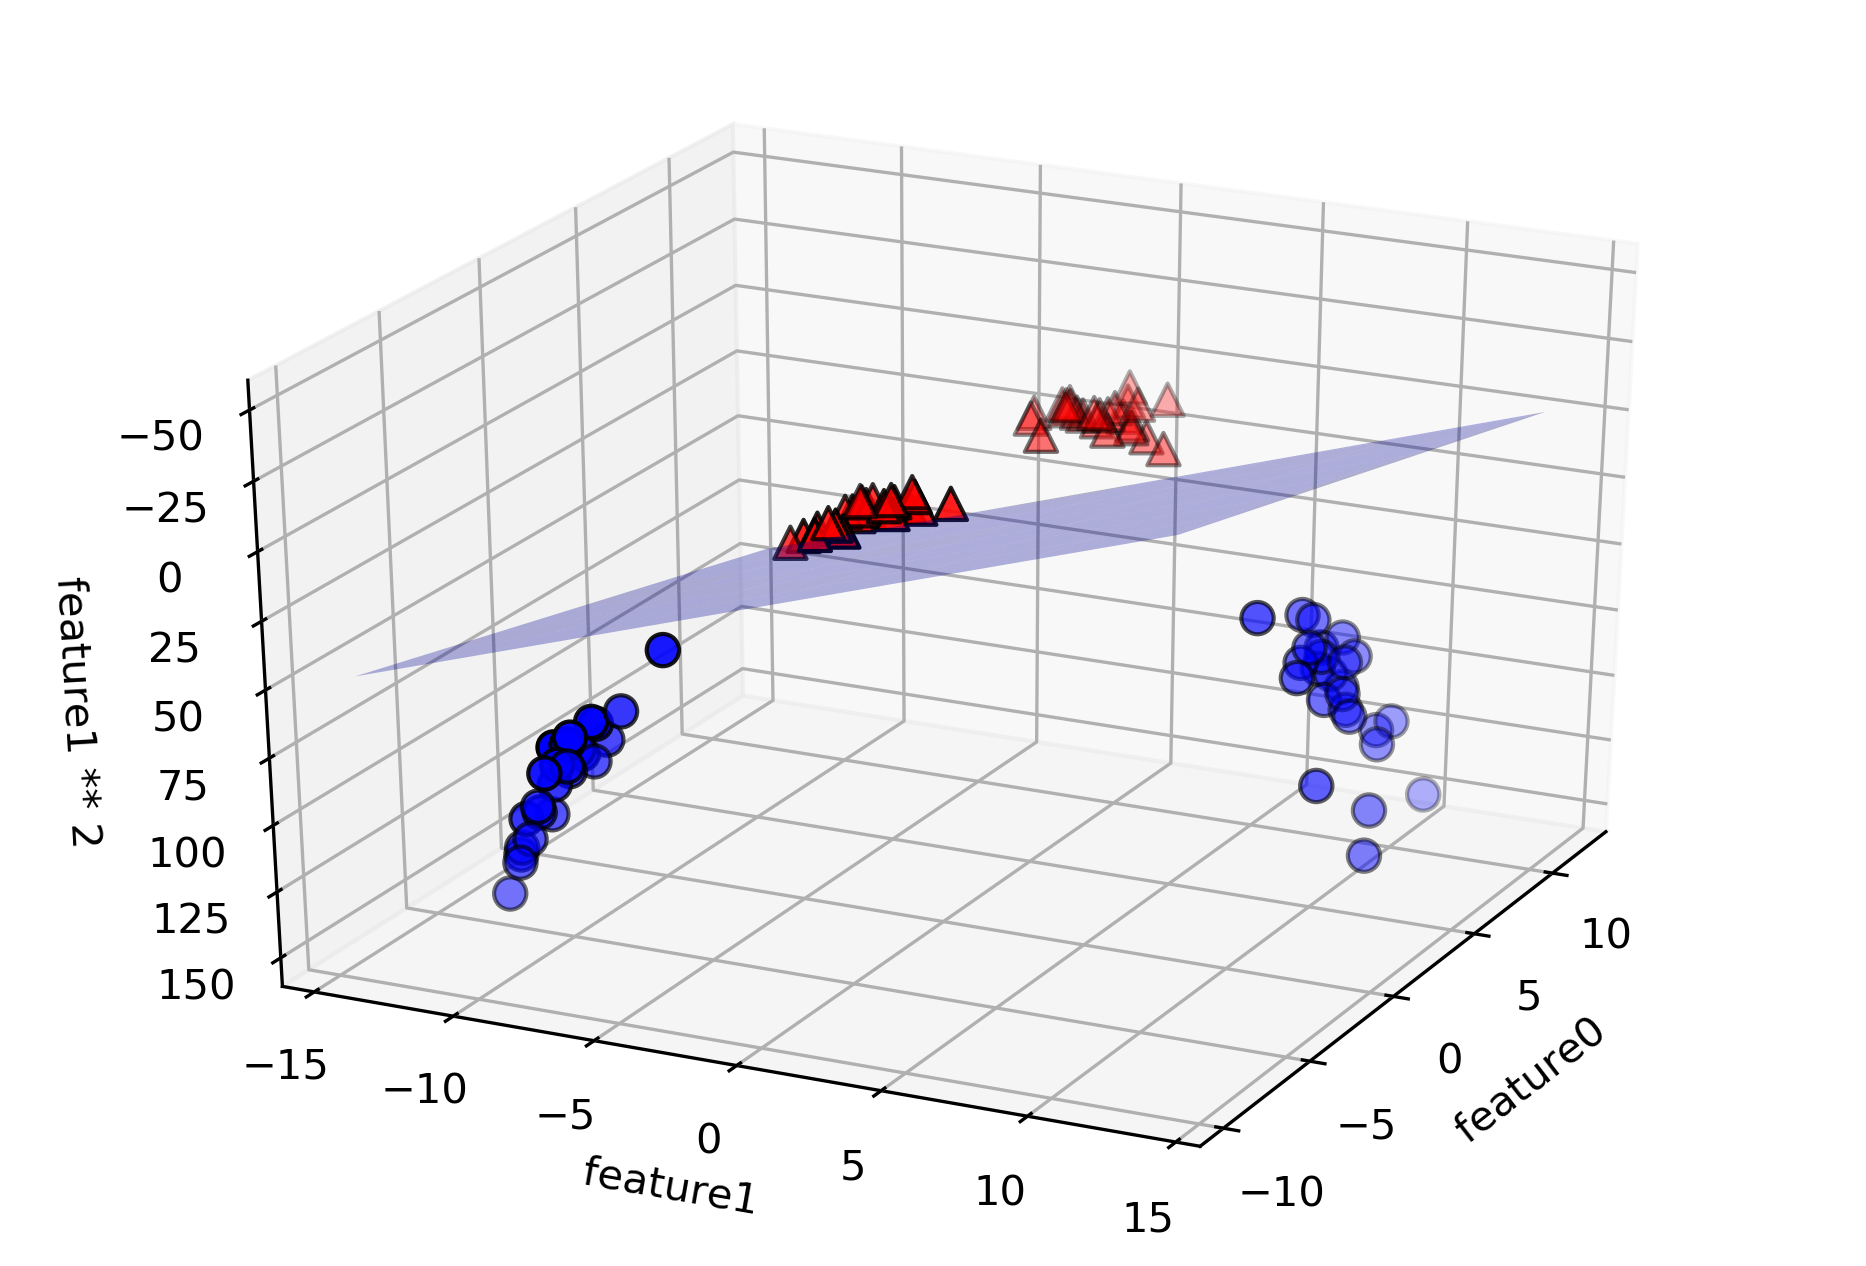

In [93]:
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [94]:
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.c_.html
type(np.c_)

numpy.lib.index_tricks.CClass

In [95]:
print(XX.ravel()[0], XX.ravel()[1], "...", XX.ravel()[-1])
print(YY.ravel()[0], YY.ravel()[1], "...", YY.ravel()[-1])
print(ZZ.ravel()[0], ZZ.ravel()[1], "...", ZZ.ravel()[-1])

print()

c = np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()]
print(c.shape)
print(c[0])
print(c[1])
print(c[-1])

-9.7406465808 -9.29840934402 ... 11.9289780217
-14.1188069772 -14.1188069772 ... 13.7806475598
48.5295693398 49.4253822796 ... -2.39862773256

(2500, 3)
[ -9.741 -14.119  48.53 ]
[ -9.298 -14.119  49.425]
[ 11.929  13.781  -2.399]


Text(0,0.5,'Feature 1')

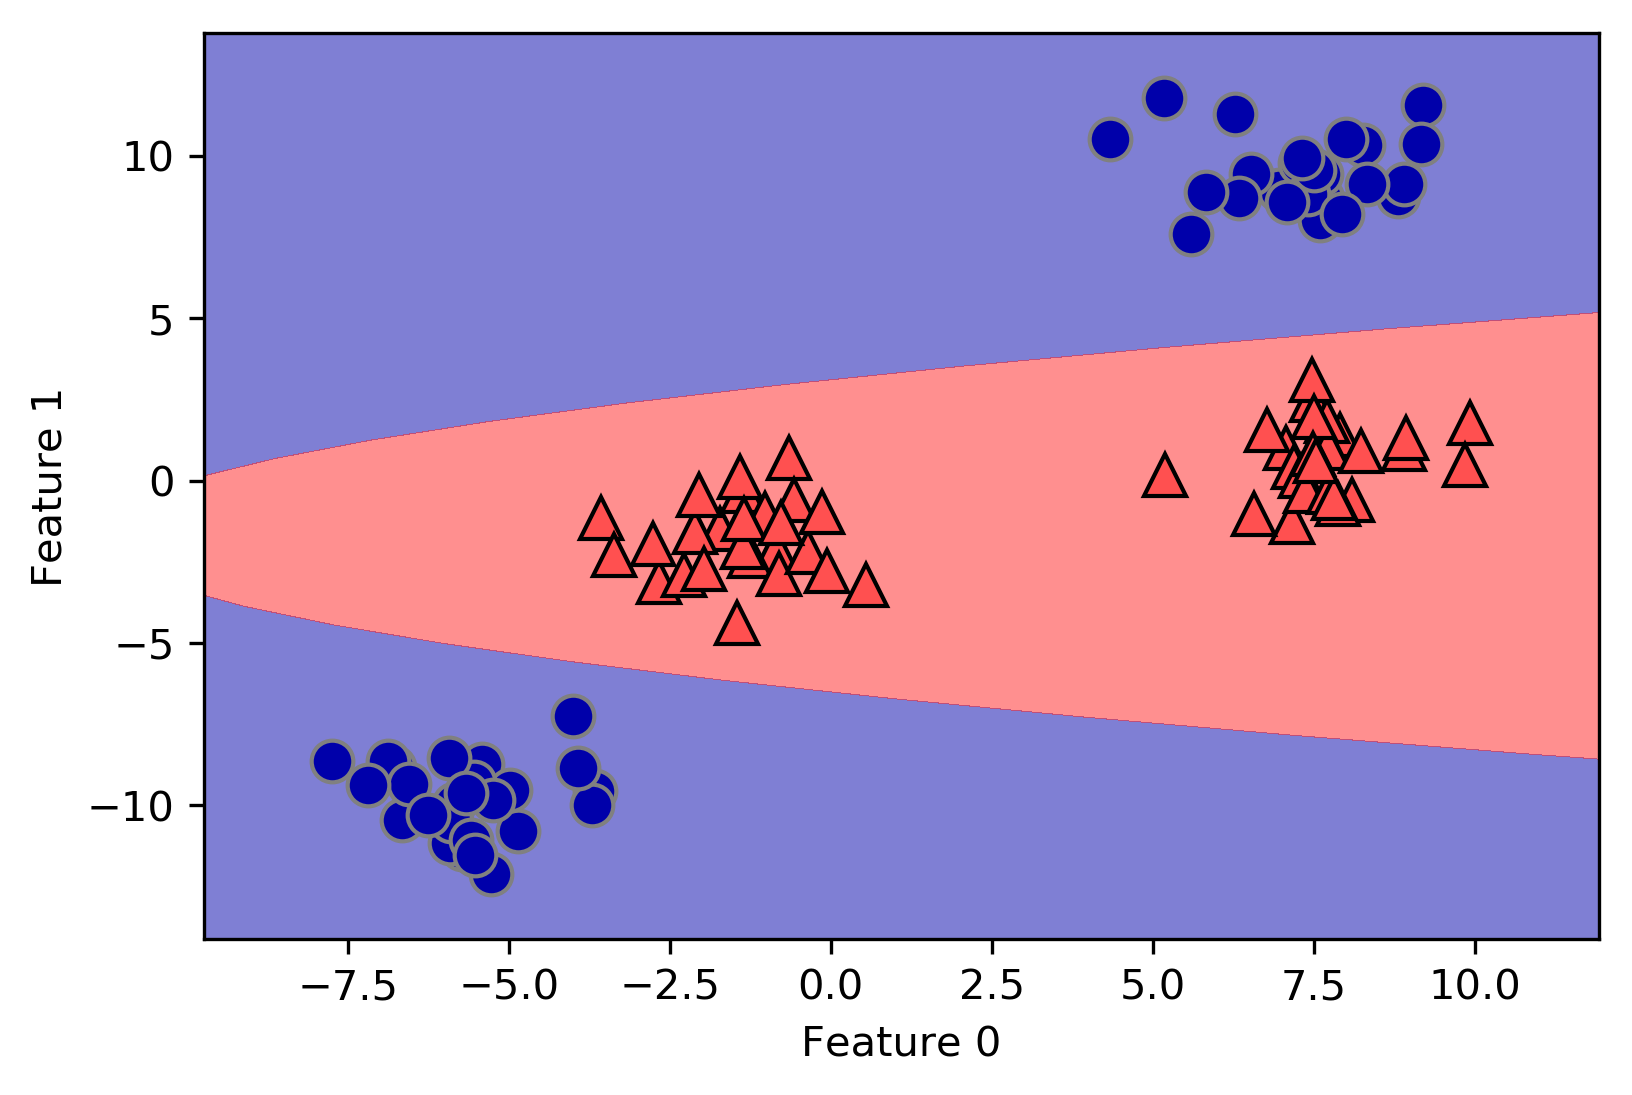

In [96]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
- 원본 데이터 특성에 비선형 특성을 추가하여 선형모델을 강력하게 만드는 방법의 단점
  - 어떤 특성을 선택하여 비선형 특성을 만들지 선택해야 하는 문제 발생
  - 많은 비선형 특성 추가에 따른 연산 비용 증가
- Kernel Trick (커널 기법)
  - 실제로 데이터 특성을 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리를 계산
  - 커널의 종류
    - 다항식 커널
      - 모든 원본 데이터 특성들에 대하여 가능한 조합을 지정된 차수까지 모두 계산
        - 예: $특성1^2 \times 특성2^5$
    - RBF (Radial Basis Function) or Gaussian (가우시안)
      - 모든 원본 데이터 특성을 무한한 특성 공간에 매핑
      - 즉, 모든 차수의 모든 다항식을 고려
        - 일반적으로 고차항이 될 수록 특성의 중요도는 떨어지게됨
<br/>
<br/>

#### Understanding SVMs
- Support Vectors
  - 주어진 훈련 데이터들 중 두 클래스 사이의 경계에 위치한 데이터 포인트들 --> 결정 경계를 만드는데 영향을 주는 포인트들
  - RBF 커널 (가우시안 커널) 에서의 데이터 포인트 $x_1$과 $x_2$ 사이 거리
    - $k_{rbf}(x_1, x_2 )=exp(-\gamma||x_1 - x_2 ||^2 )$
    - $\gamma$ : 가우시안 커널의 폭을 제어하는 매개변수

[[  8.106   4.287]
 [  9.502   1.938]
 [ 11.564   1.339]
 [ 10.24    2.455]
 [  7.998   4.853]]
[[-10.     -6.252  -3.734  10.      9.986]]


Text(0,0.5,'Feature 1')

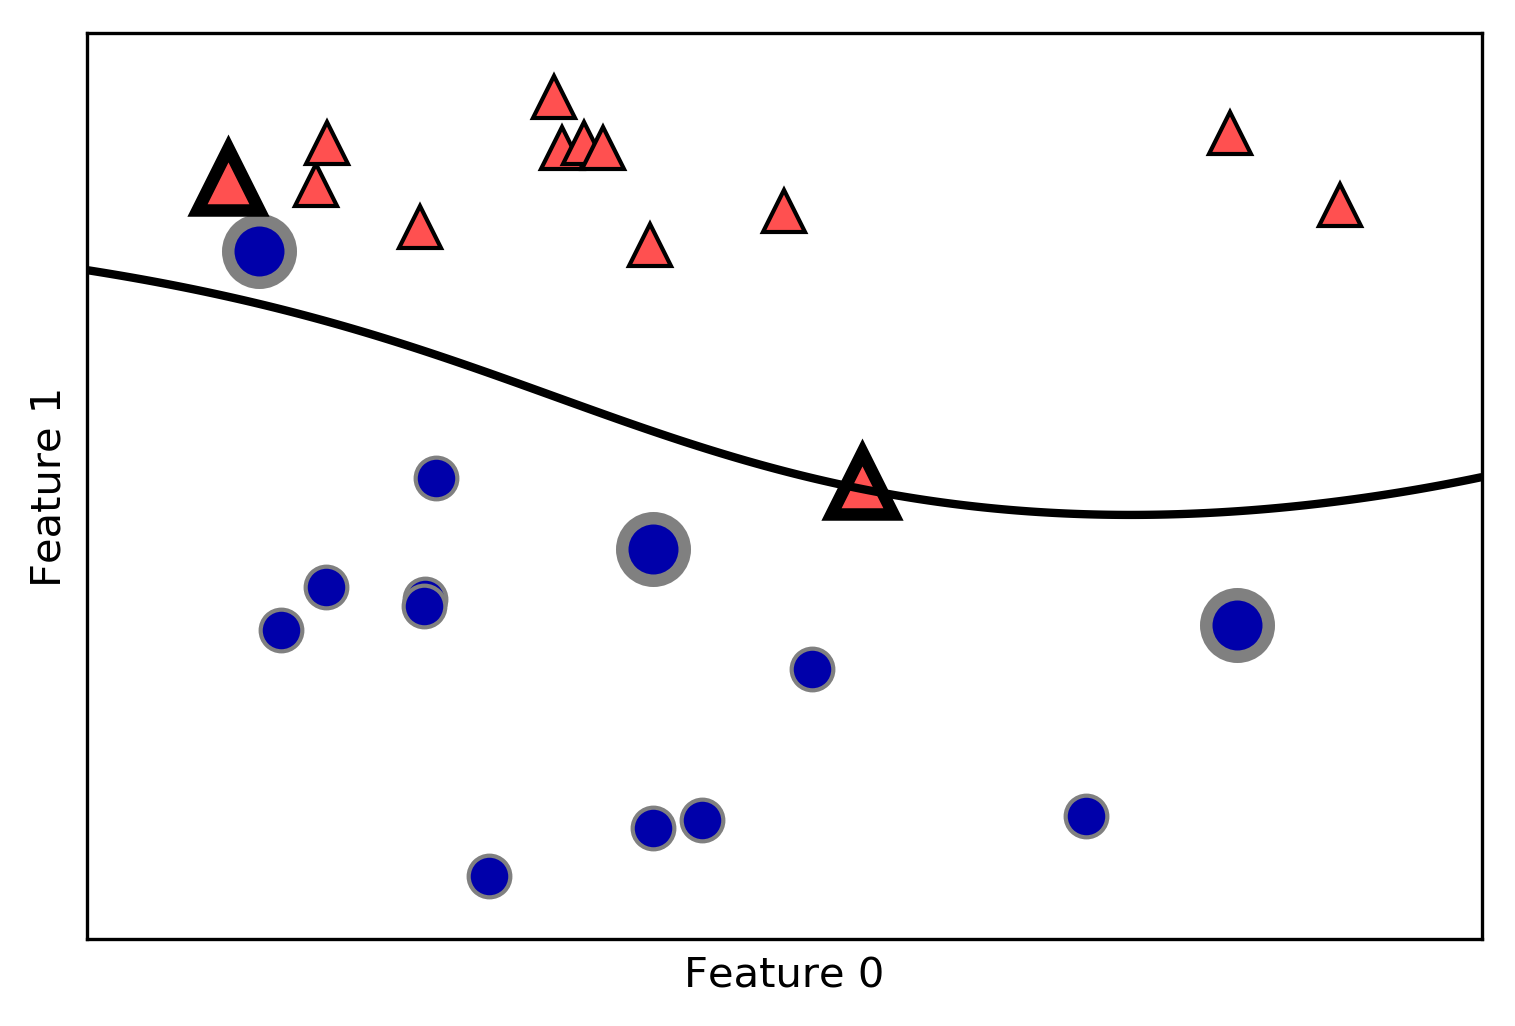

In [139]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# plot support vectors
sv = svm.support_vectors_
dual_coef = svm.dual_coef_
print(sv)
print(dual_coef)
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = dual_coef.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters
- SVC(kernel='rbf', C=10, gamma=0.1) 에서 각 매개변수 튜닝
  - gamma
    - 가우시안 커널 폭($\gamma$)의 역수
    - 훈련 샘플 데이터가 미치는 영향의 범위 결정
    - gamma값이 커짐 -->  $\gamma$이 작아짐 --> 가우시안 커널의 반경이 작아짐 --> 모델의 복잡도가 높아짐
    - gamma값이 작아짐 -->  $\gamma$이 커짐 --> 가우시안 커널의 반경이 커짐 --> 모델의 복잡도가 낮아짐
  - C (Regulation, 규제 변수)
    - C가 커짐 --> 샘플 데이터의 자유도가 작아짐 (제약이 작아짐) --> 샘플 데이터가 모델에 많은 영향을 줌 --> 모델의 복잡도가 높아짐
    - C가 작아짐 --> 샘플 데이터의 자유도가 커짐 (제약이 커짐) --> 샘플 데이터가 모델에 적은 영향을 줌 --> 모델의 복잡도가 낮아짐

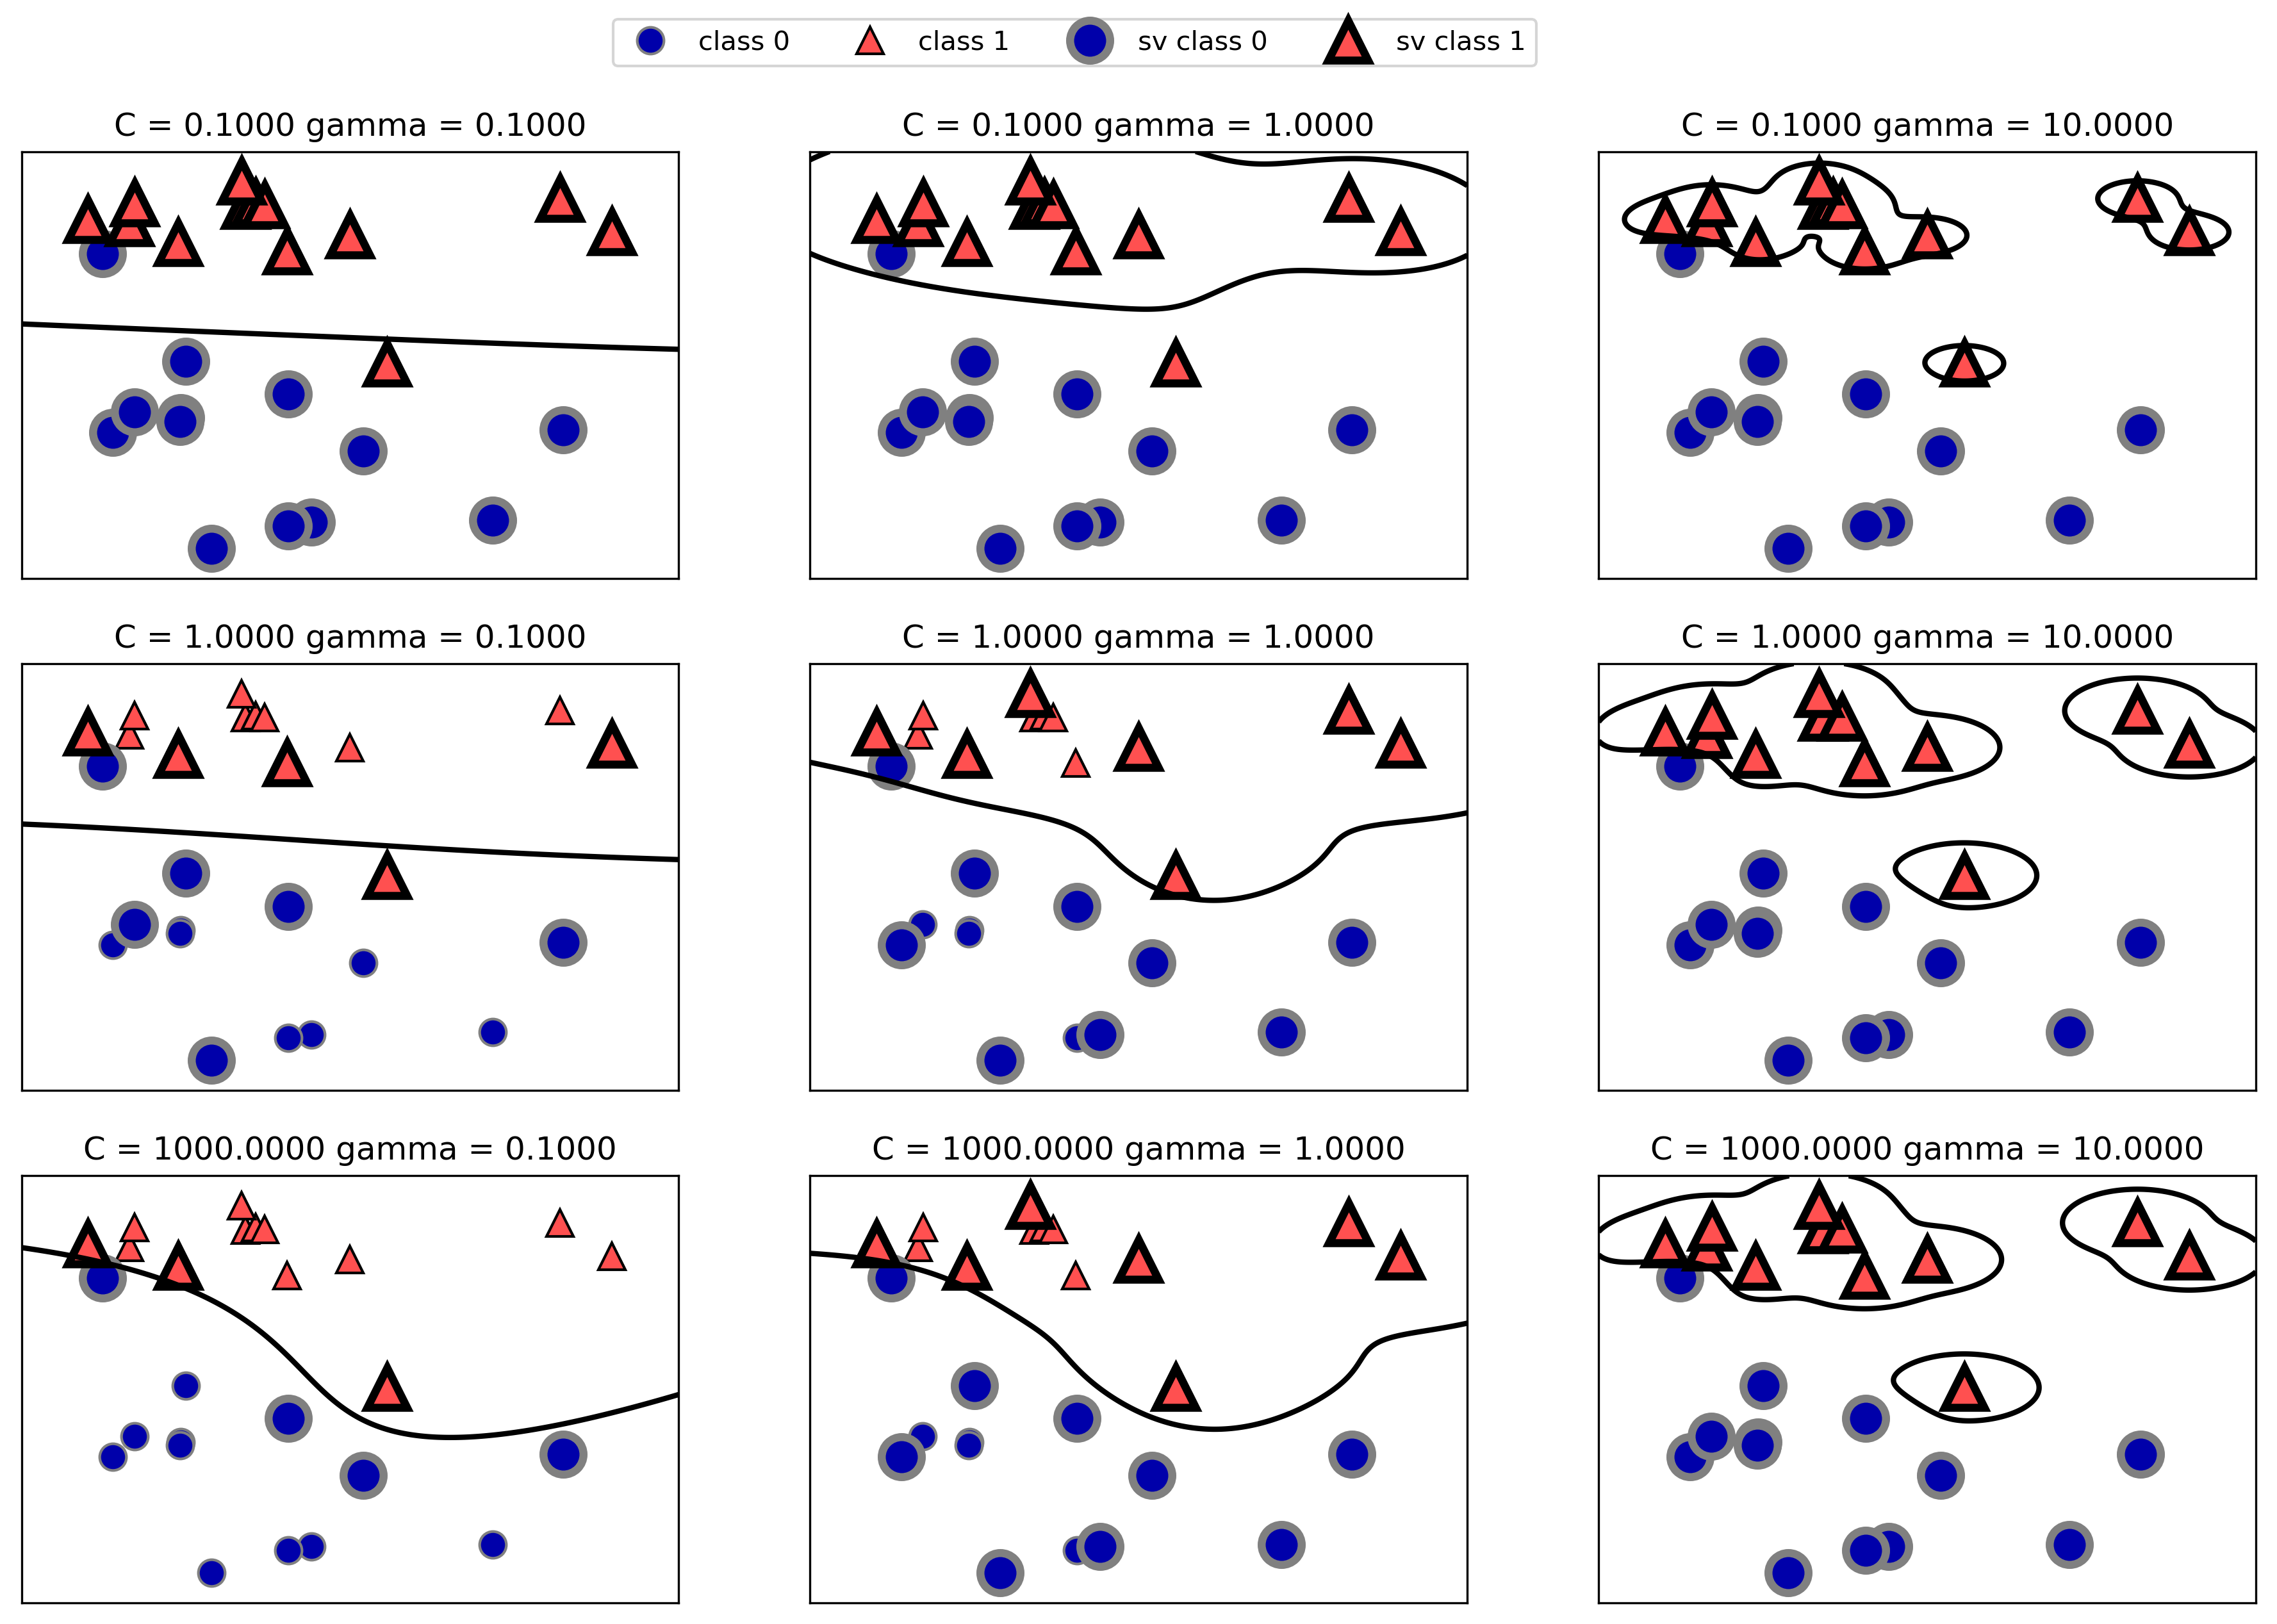

In [98]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Text(0,0.5,'Feature magnitude')

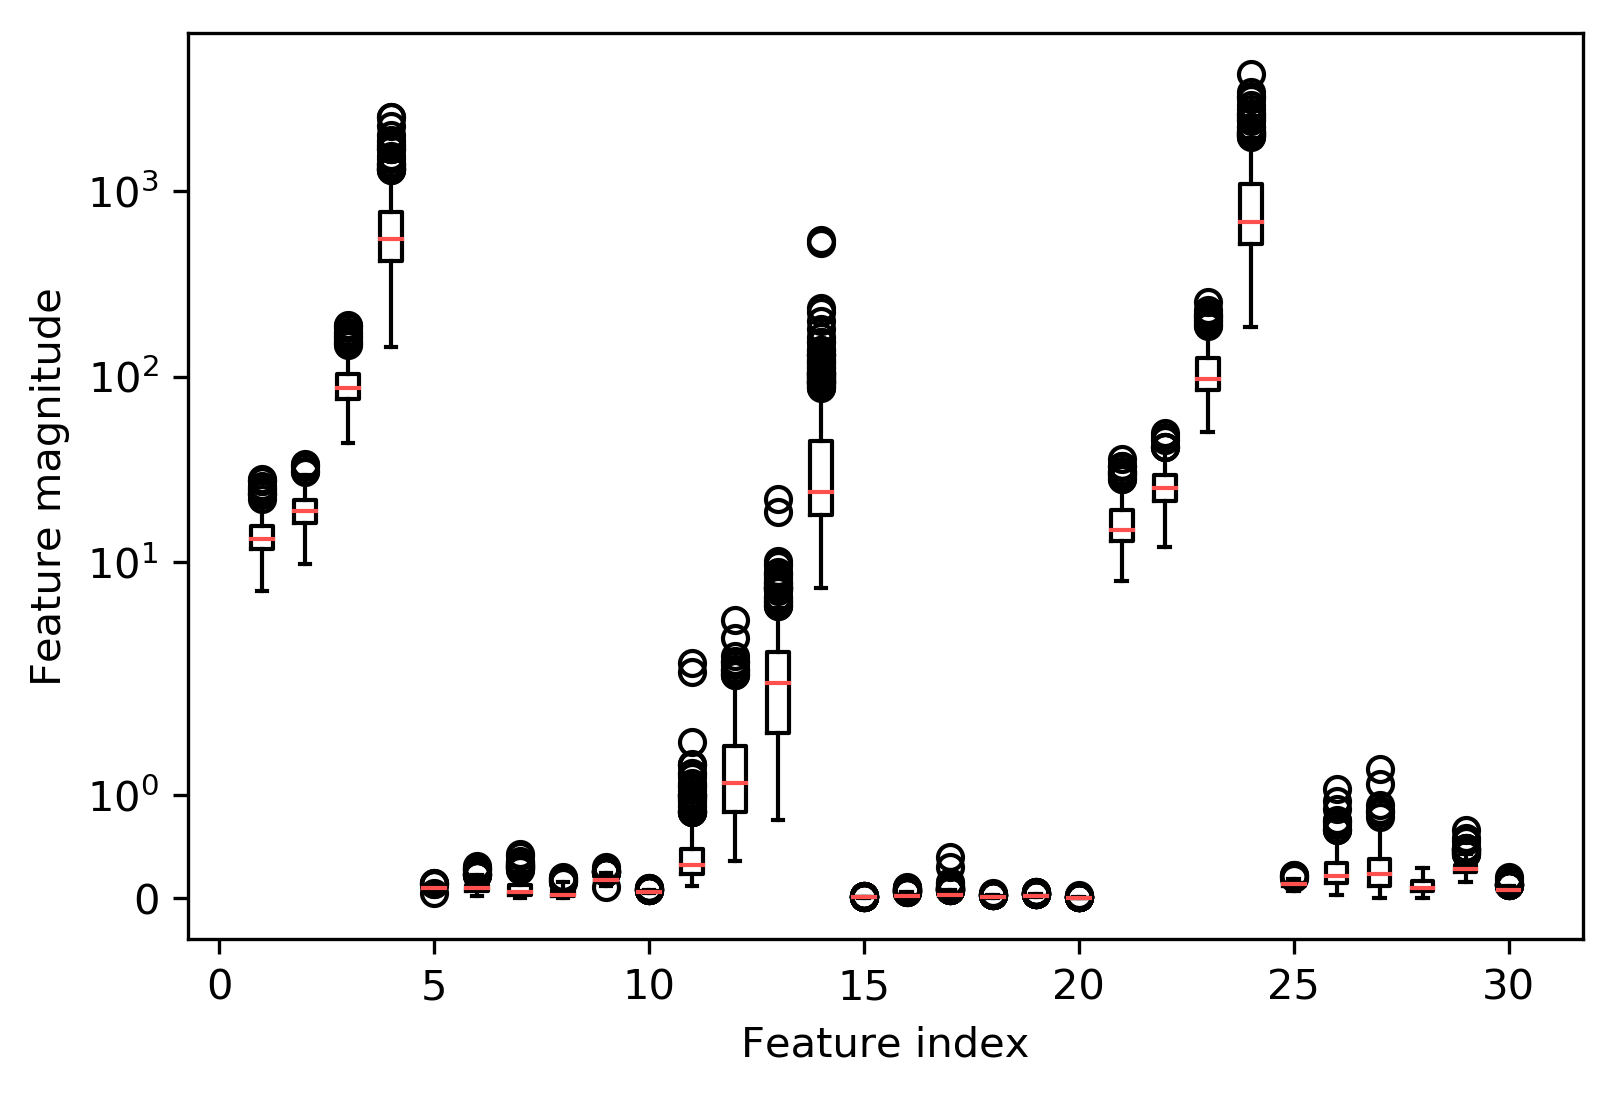

In [100]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Preprocessing data for SVMs

- SVM에서는 특히 각 특성값의 범위가 비슷해지도록 정규화하는 것 매우 중요
- 정규화 식
$$\frac{X-min(X)}{max(X)-min(X)}$$

In [101]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


- [NOTE] 테스트 데이터 세트에 대해서도 동일한 정규화를 하지만, 훈련 데이터 세트에서 계산된 최소값과 최대값과 해당 범위를 사용

In [102]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [103]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


In [104]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### Strengths, weaknesses and parameters
- SVM 장점
  - 다양한 데이터셋에 대해서도 잘 작동하는 강력한 모델
  - 데이터의 특성이 몇 개 되지 않더라도 복잡한 결정 경계 생성 가능
- SVM 단점
  - 샘플 데이터 개수가 너무 많을 때 성능이 오히려 떨어질 수 있음
  - 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함

### Neural Networks (Deep Learning)
#### The Neural Network Model

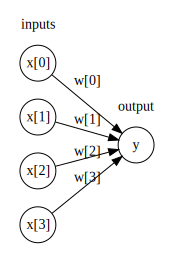

In [105]:
display(mglearn.plots.plot_logistic_regression_graph())

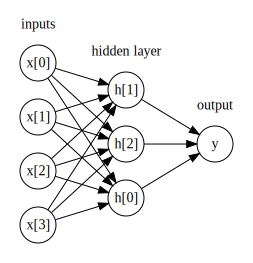

In [106]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

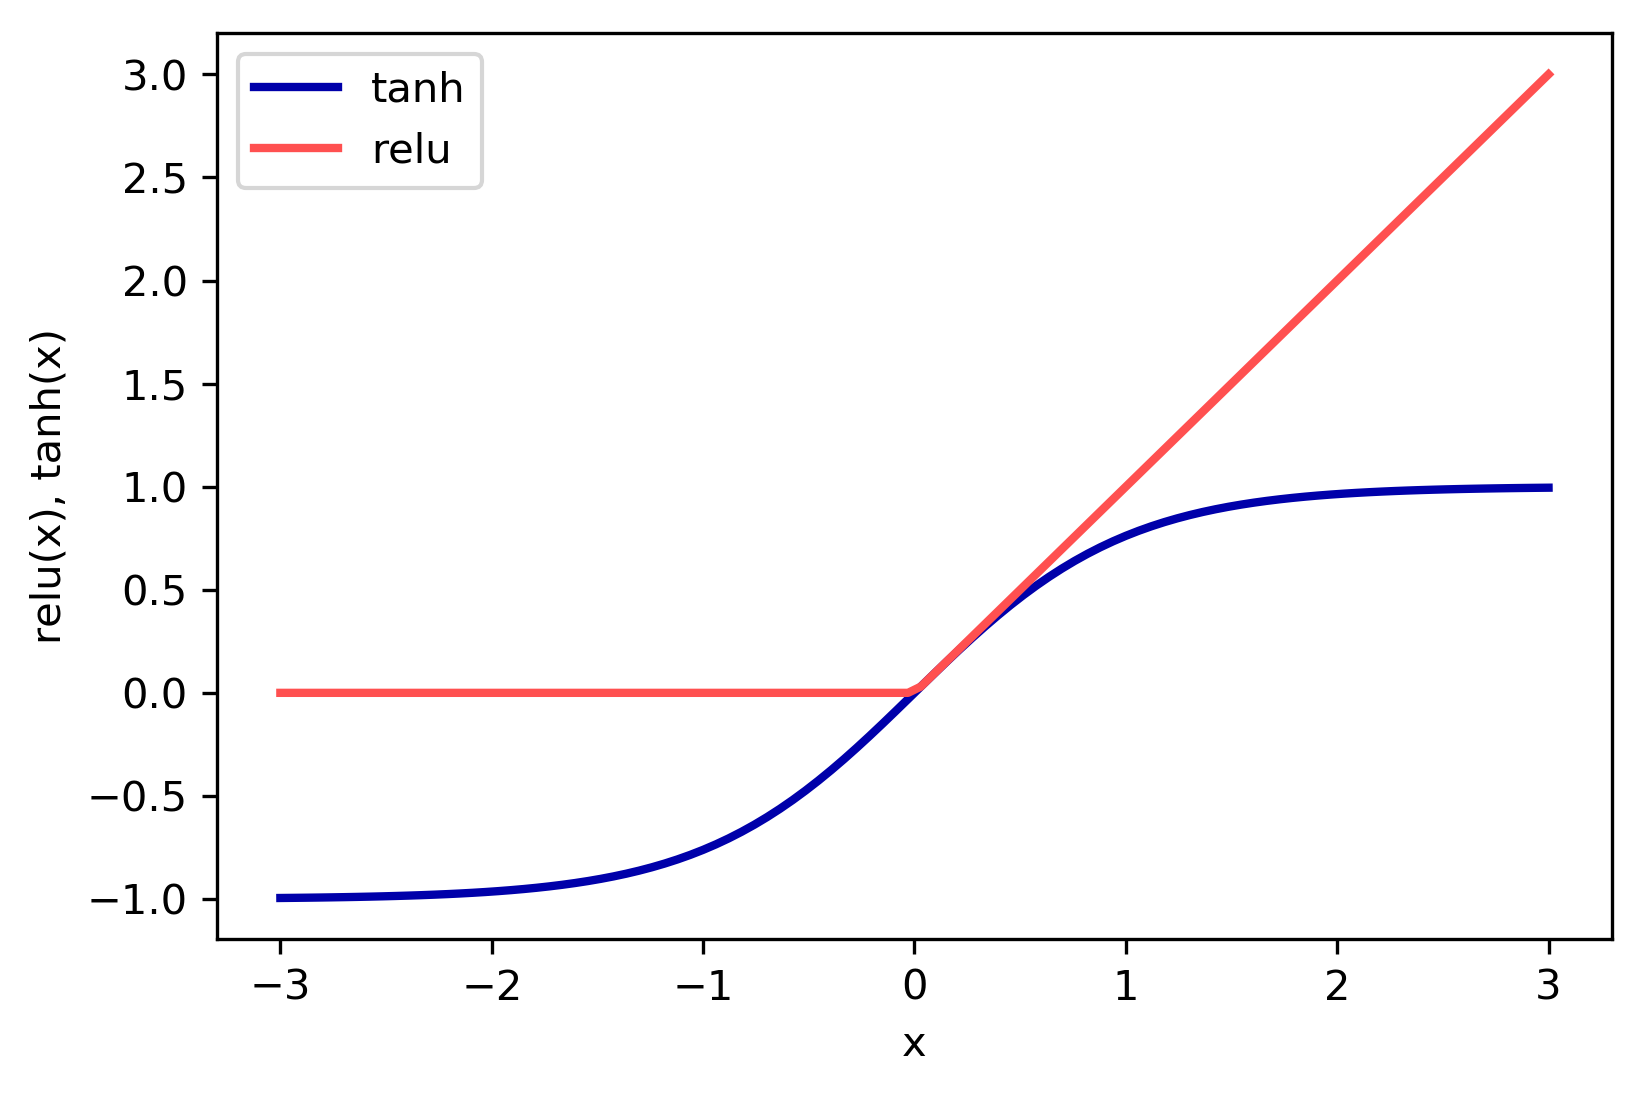

In [107]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

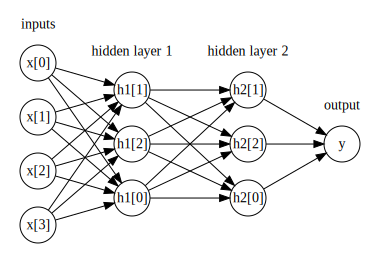

In [108]:
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks
- MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10], activation='tanh')
  - hidden_layer_sizes 매개변수가 없을 때 기본적인 신경망 구조
    - hidden layer 1개
    - hidden unit 개수: 100개
  - activation
    - 기본값: relu
    - tanh
  - solver (=optimizer)
    - 기본값: adam
      - 데이터의 스케일에 민감 --> 정규화 (평균 0, 분산 1) 중요
    - lbfgs
      - 대부분의 경우 안정적
      - 대량의 데이터에 대한 많은 연산 필요
    - sgd
      - momentum 및 nesterov_momentum 매개변수 지정 필요
      - momentum
        - 새롭게 계산된 그레디언트에 대해 momentum 매개변수에 지정된 비율만큼만 반영 --> 관성 적용
      - nesterov_momentum
        - momentum 방식으로 구한 그레디언트를 이전 그레디언트로 가정
        - 한번 더 momentum 방식을 적용하여 새로운 그레디언트 계산

Text(0,0.5,'Feature 1')

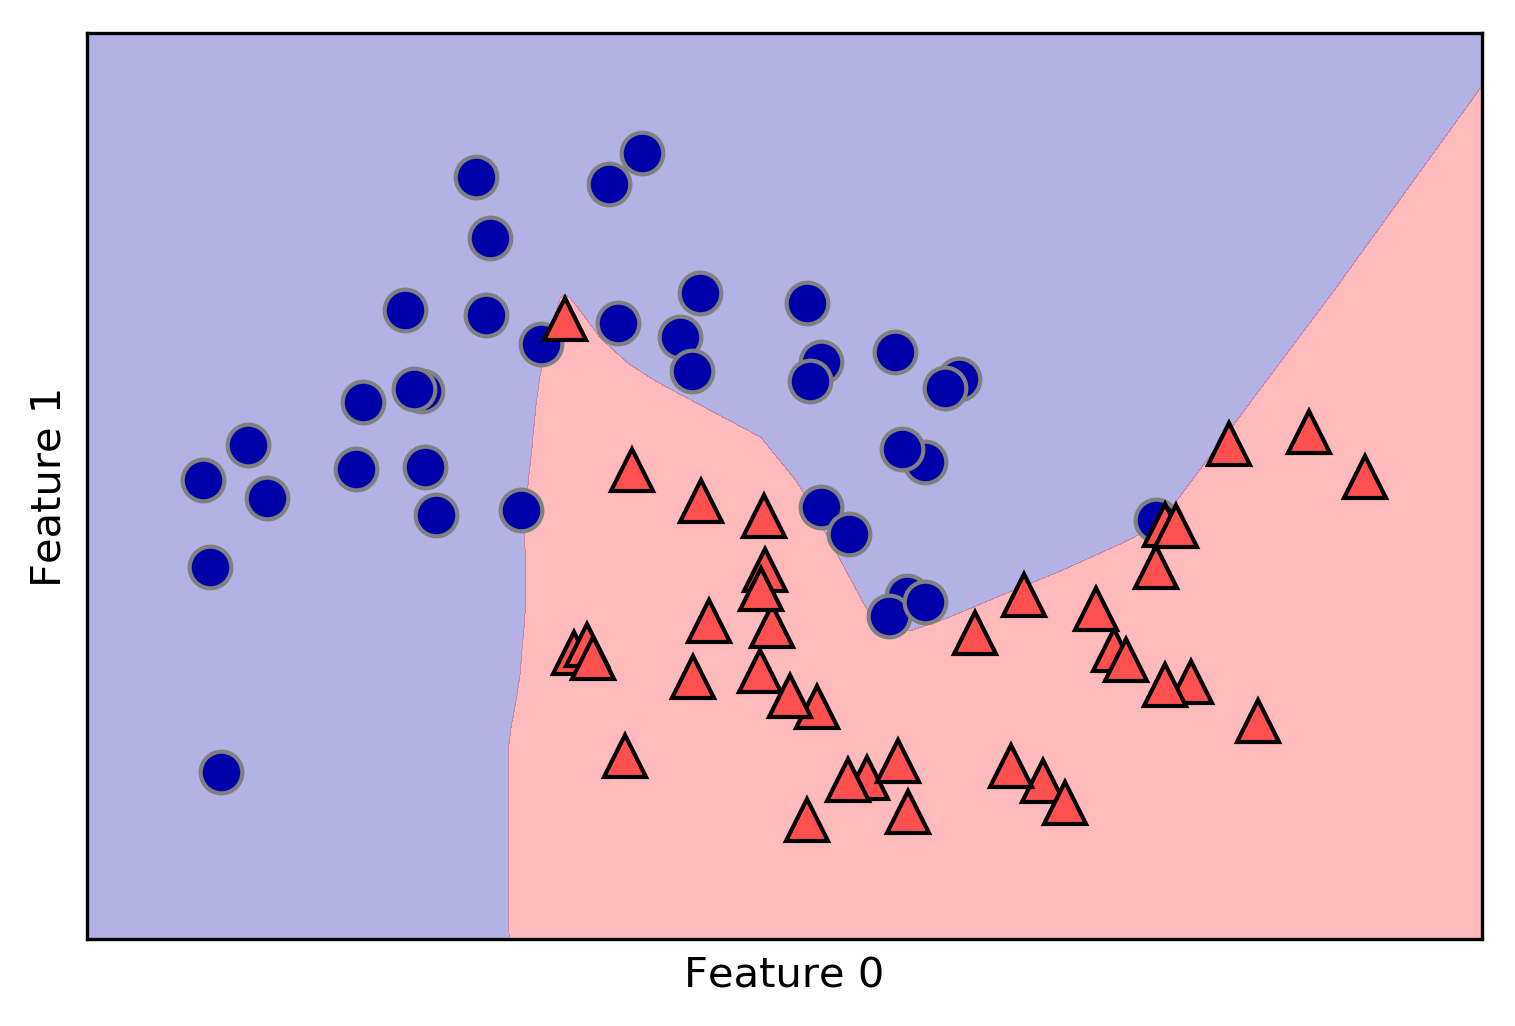

In [141]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

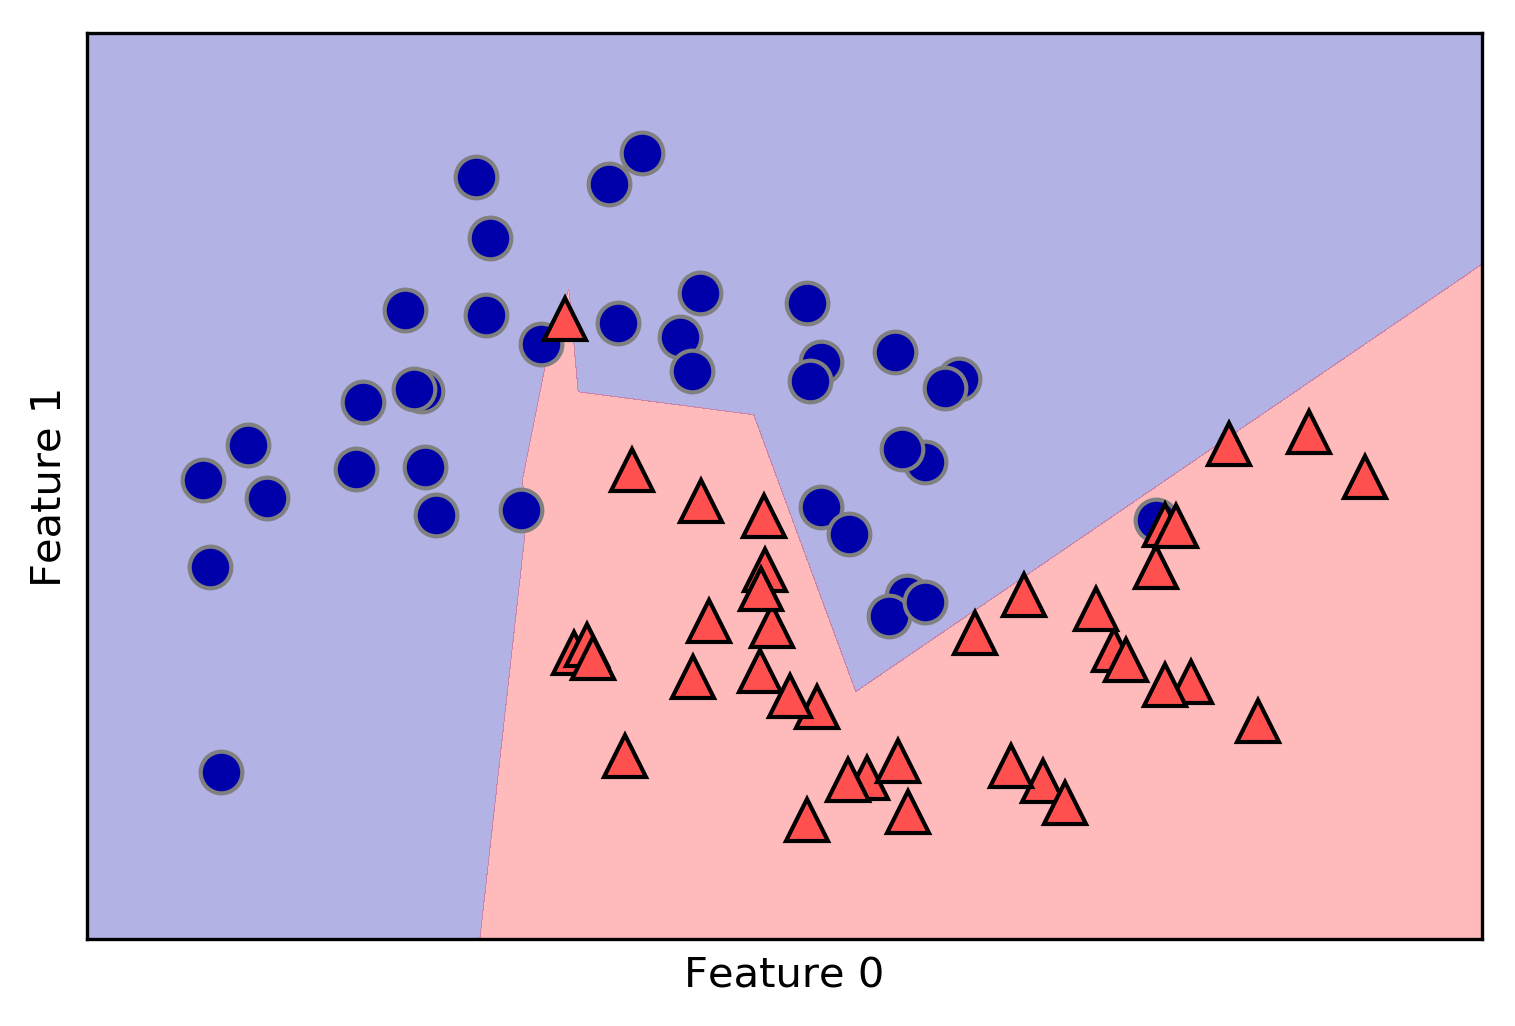

In [142]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

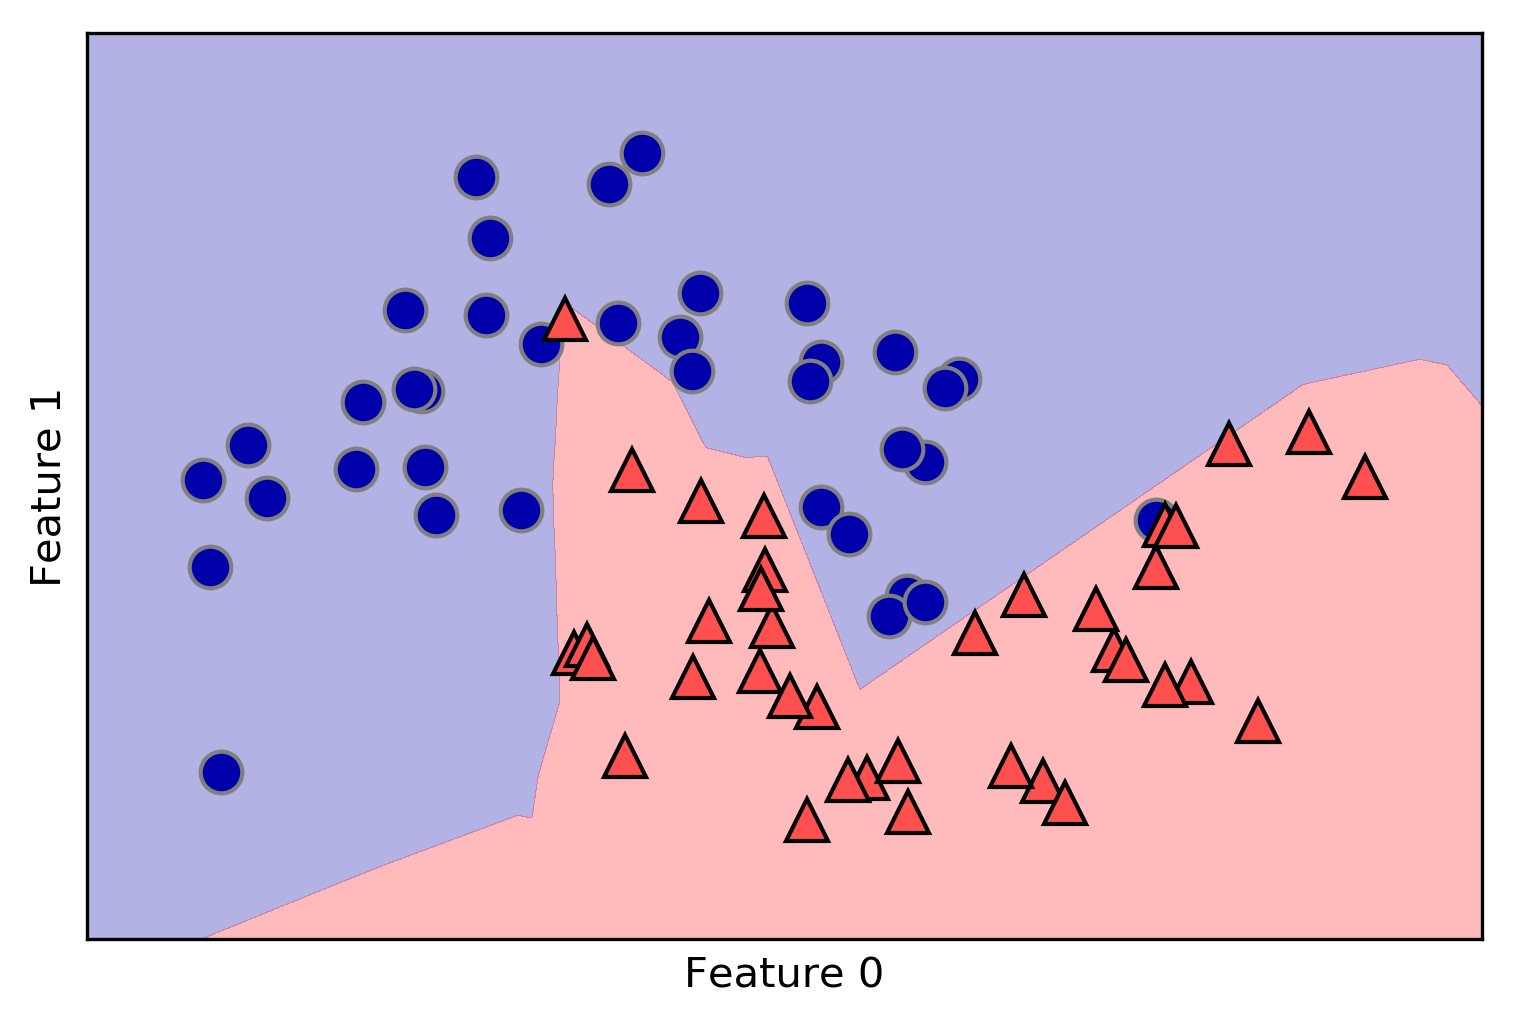

In [144]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

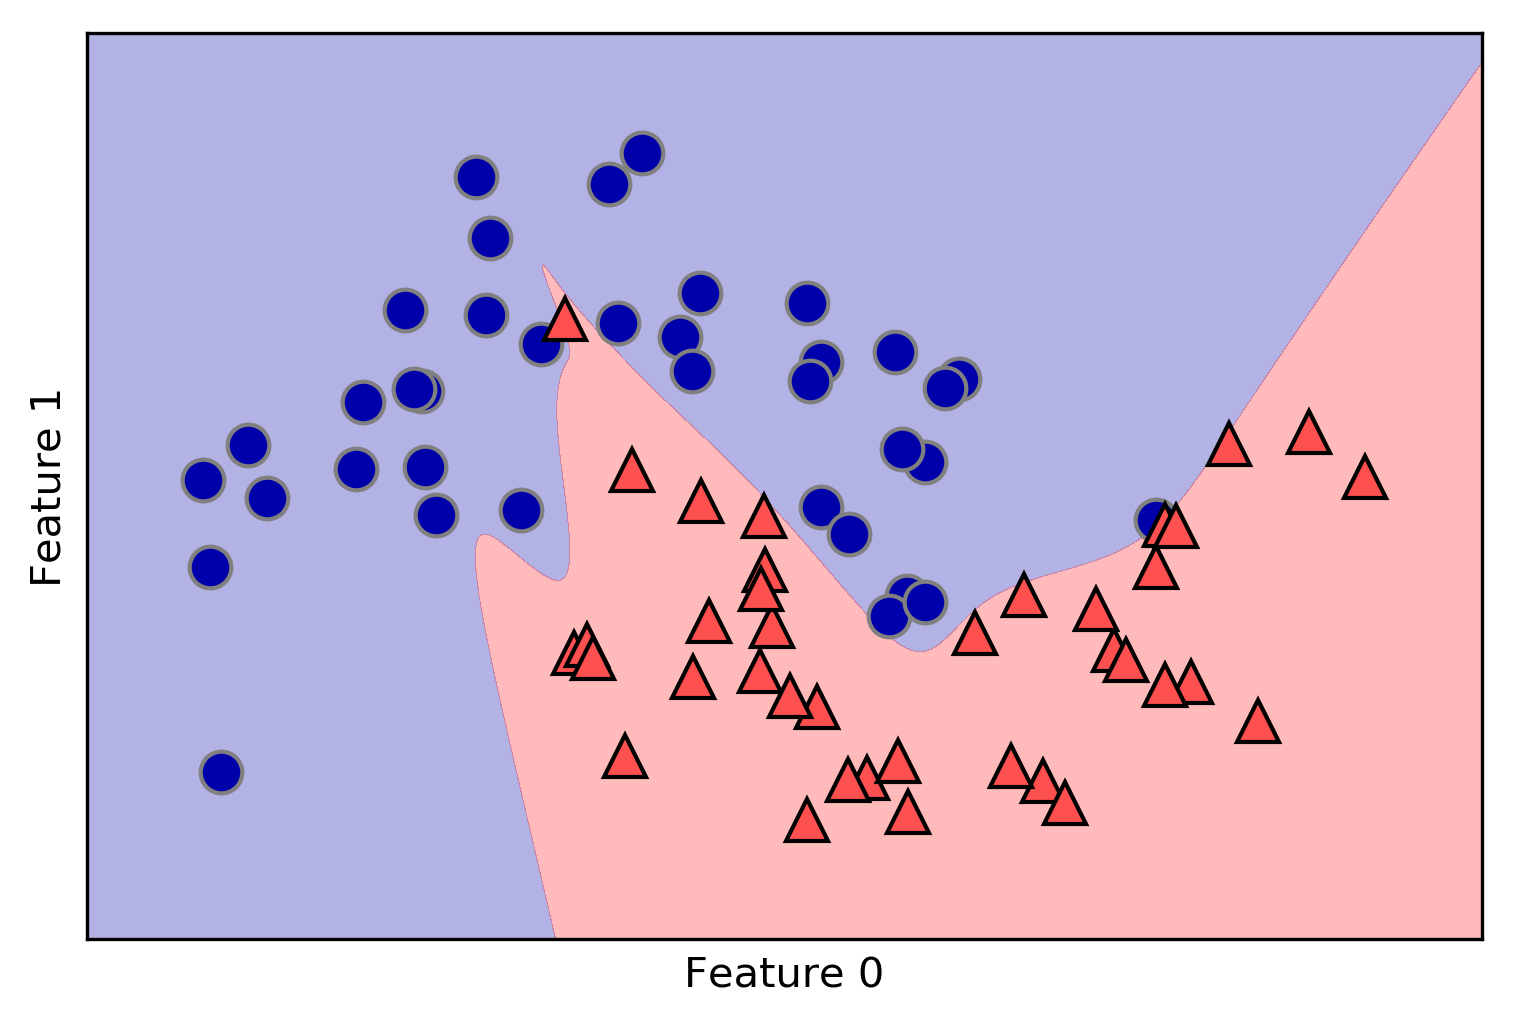

In [145]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- L2 규제 사용
  - alpha 매개변수 사용
    - 기본값: 0

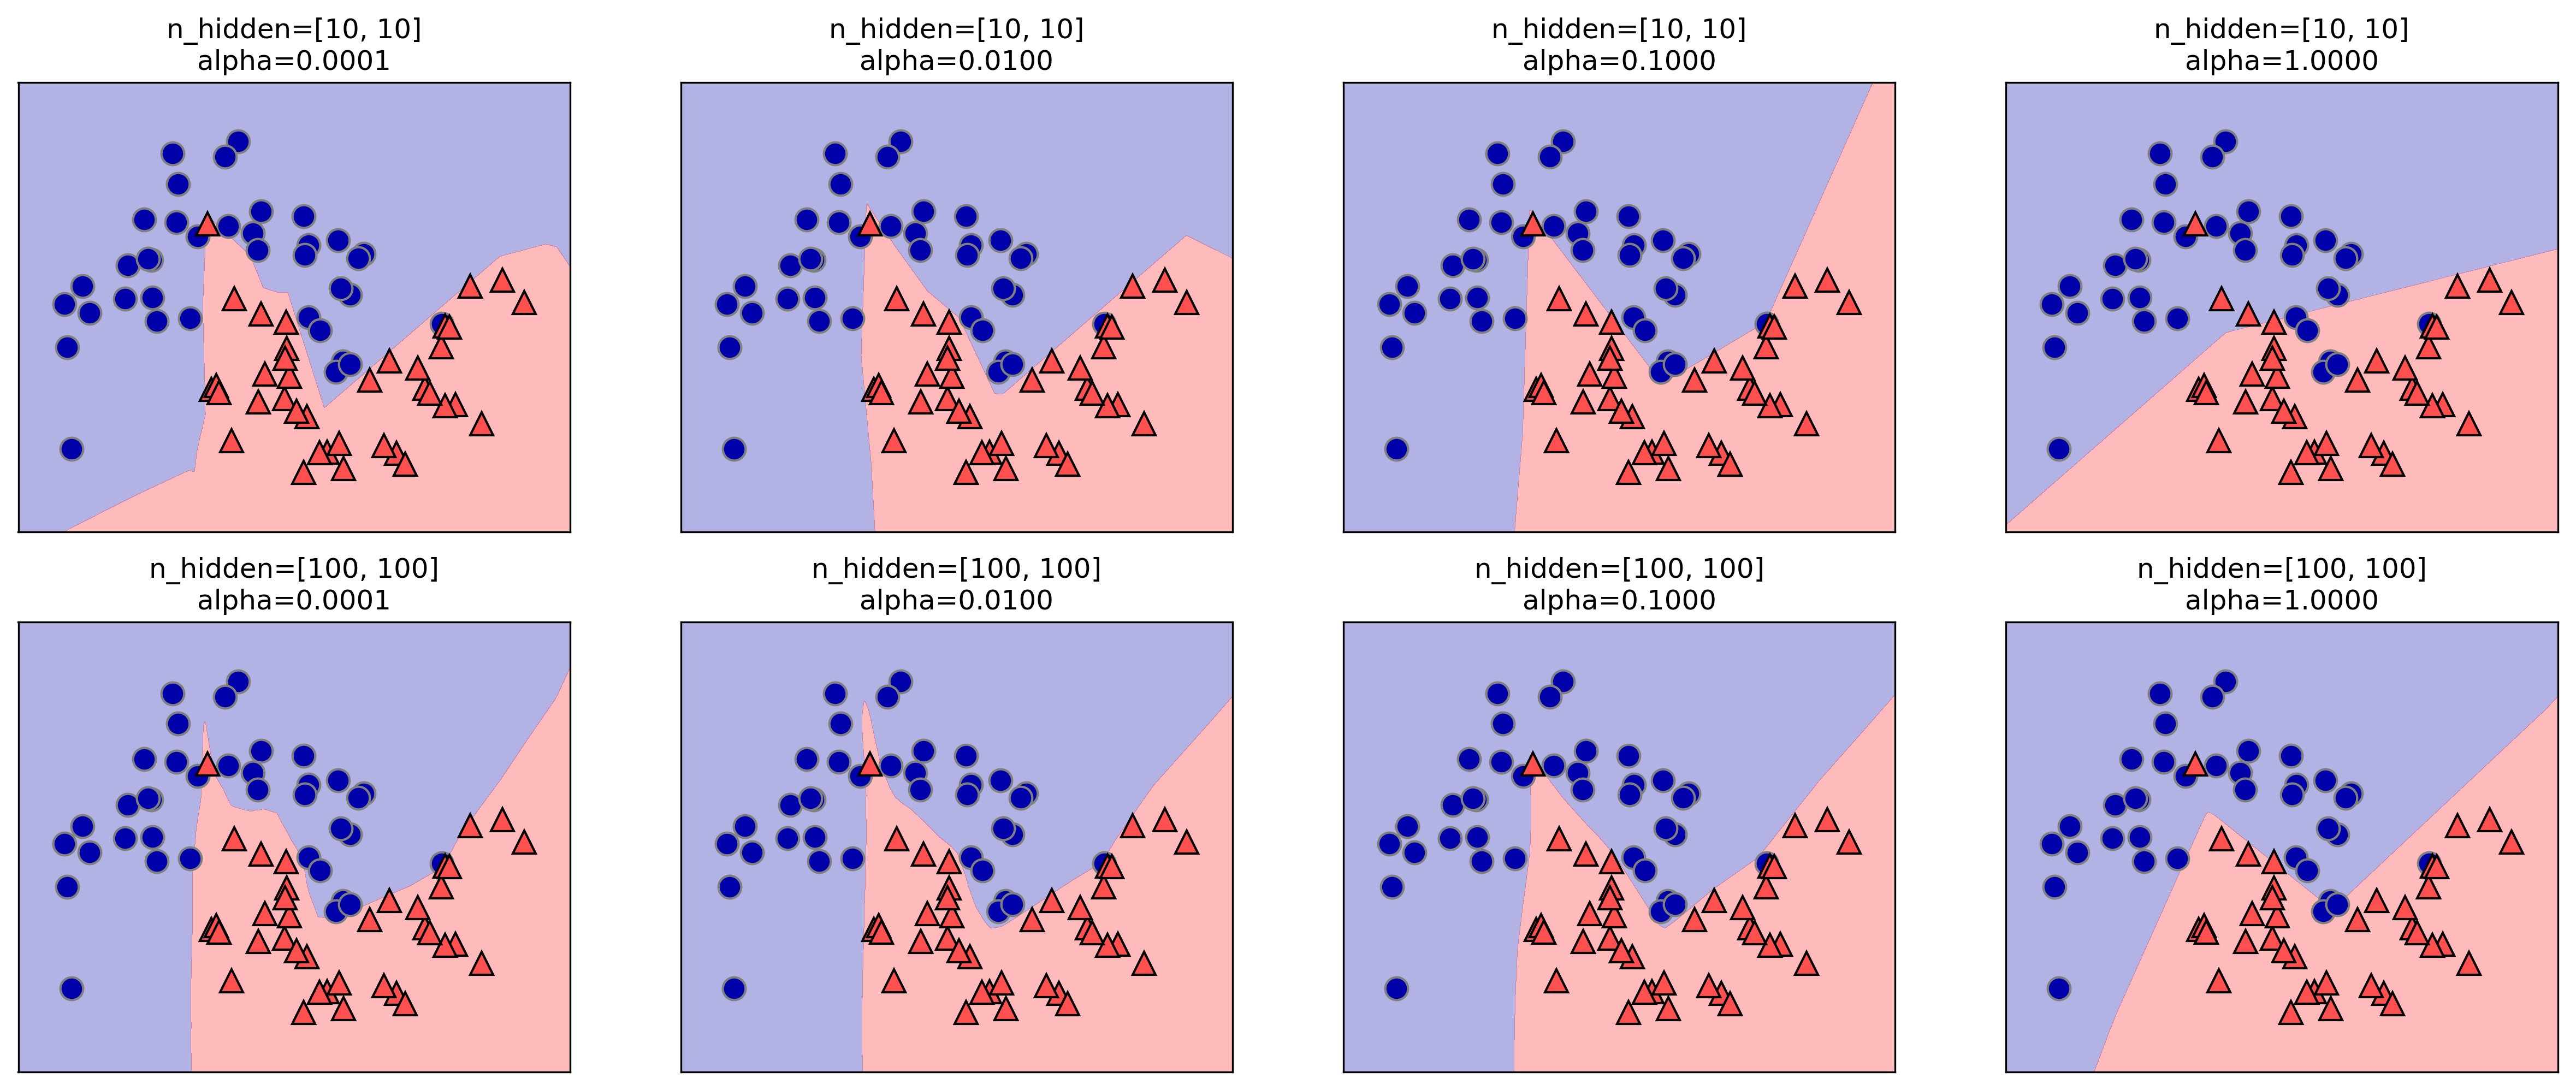

In [146]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

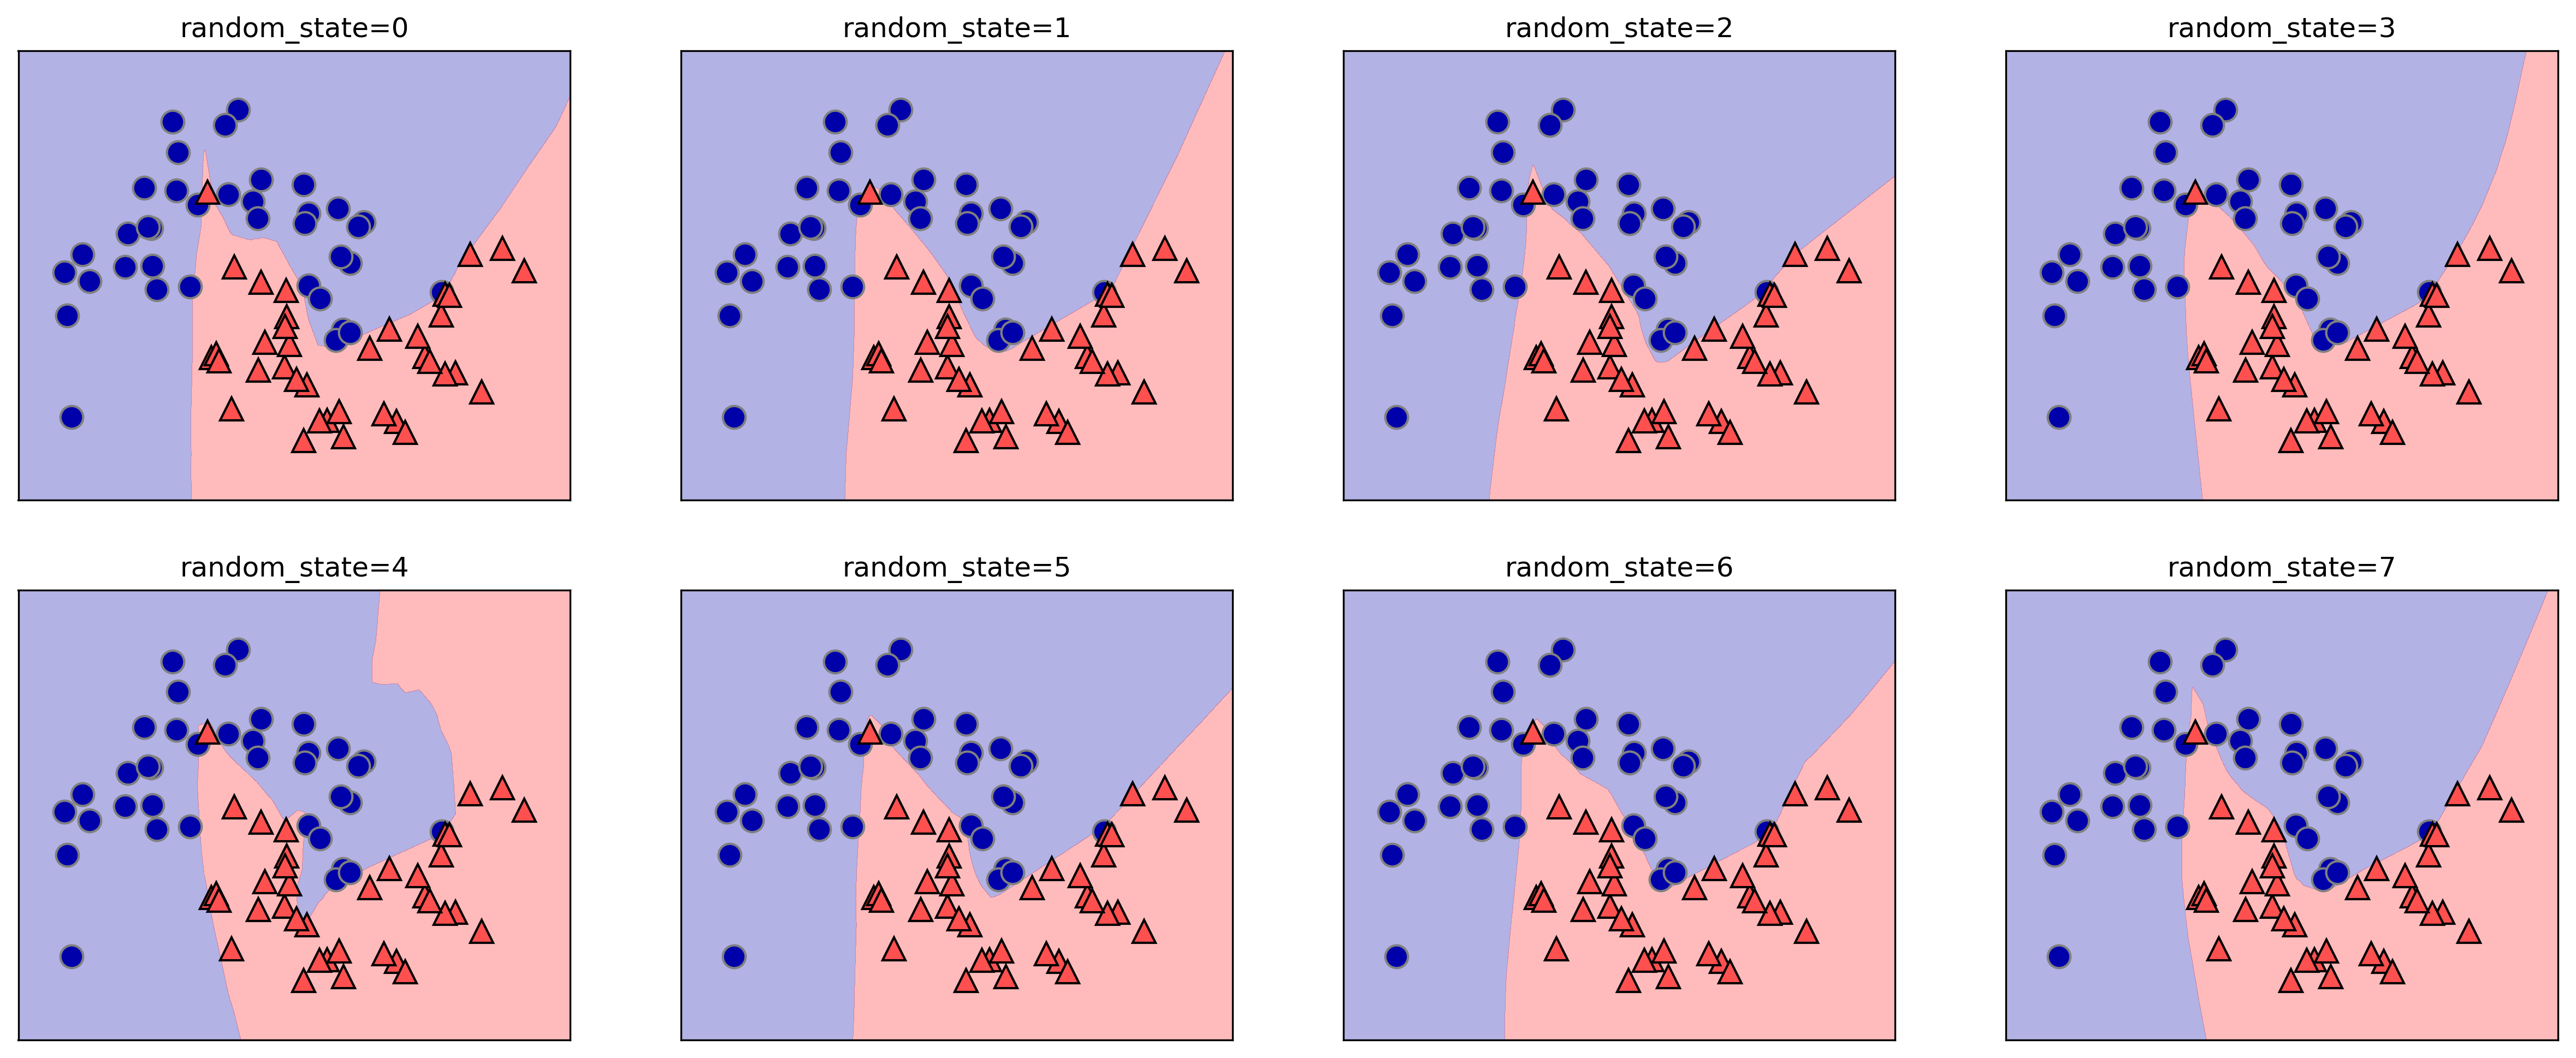

In [147]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i, hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
    ax.set_title("random_state={}".format(i))

In [115]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[   28.11     39.28    188.5    2501.        0.163     0.345     0.427
     0.201     0.304     0.097     2.873     4.885    21.98    542.2
     0.031     0.135     0.396     0.053     0.079     0.03     36.04
    49.54    251.2    4254.        0.223     1.058     1.252     0.291
     0.664     0.207]


In [148]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.91
Accuracy on test set: 0.88


- 유방암 데이터에 대한 정규화

In [117]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/Users/yhhan/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


- adam optimizer에서 200번 정도의 iteration으로는 converge 시키기 부족함 --> max_iter 값 증가 필요

In [149]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.972


- L2 규제 (일반화 성능 증대)
  - alpha = 1.0

In [151]:
mlp = MLPClassifier(max_iter=1000, alpha=1.0, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


- hidden layer 내에 존재하는 가중치 값 시각화
  - 작은 가중치를 지닌 특성이 덜 중요하다고 해석 가능

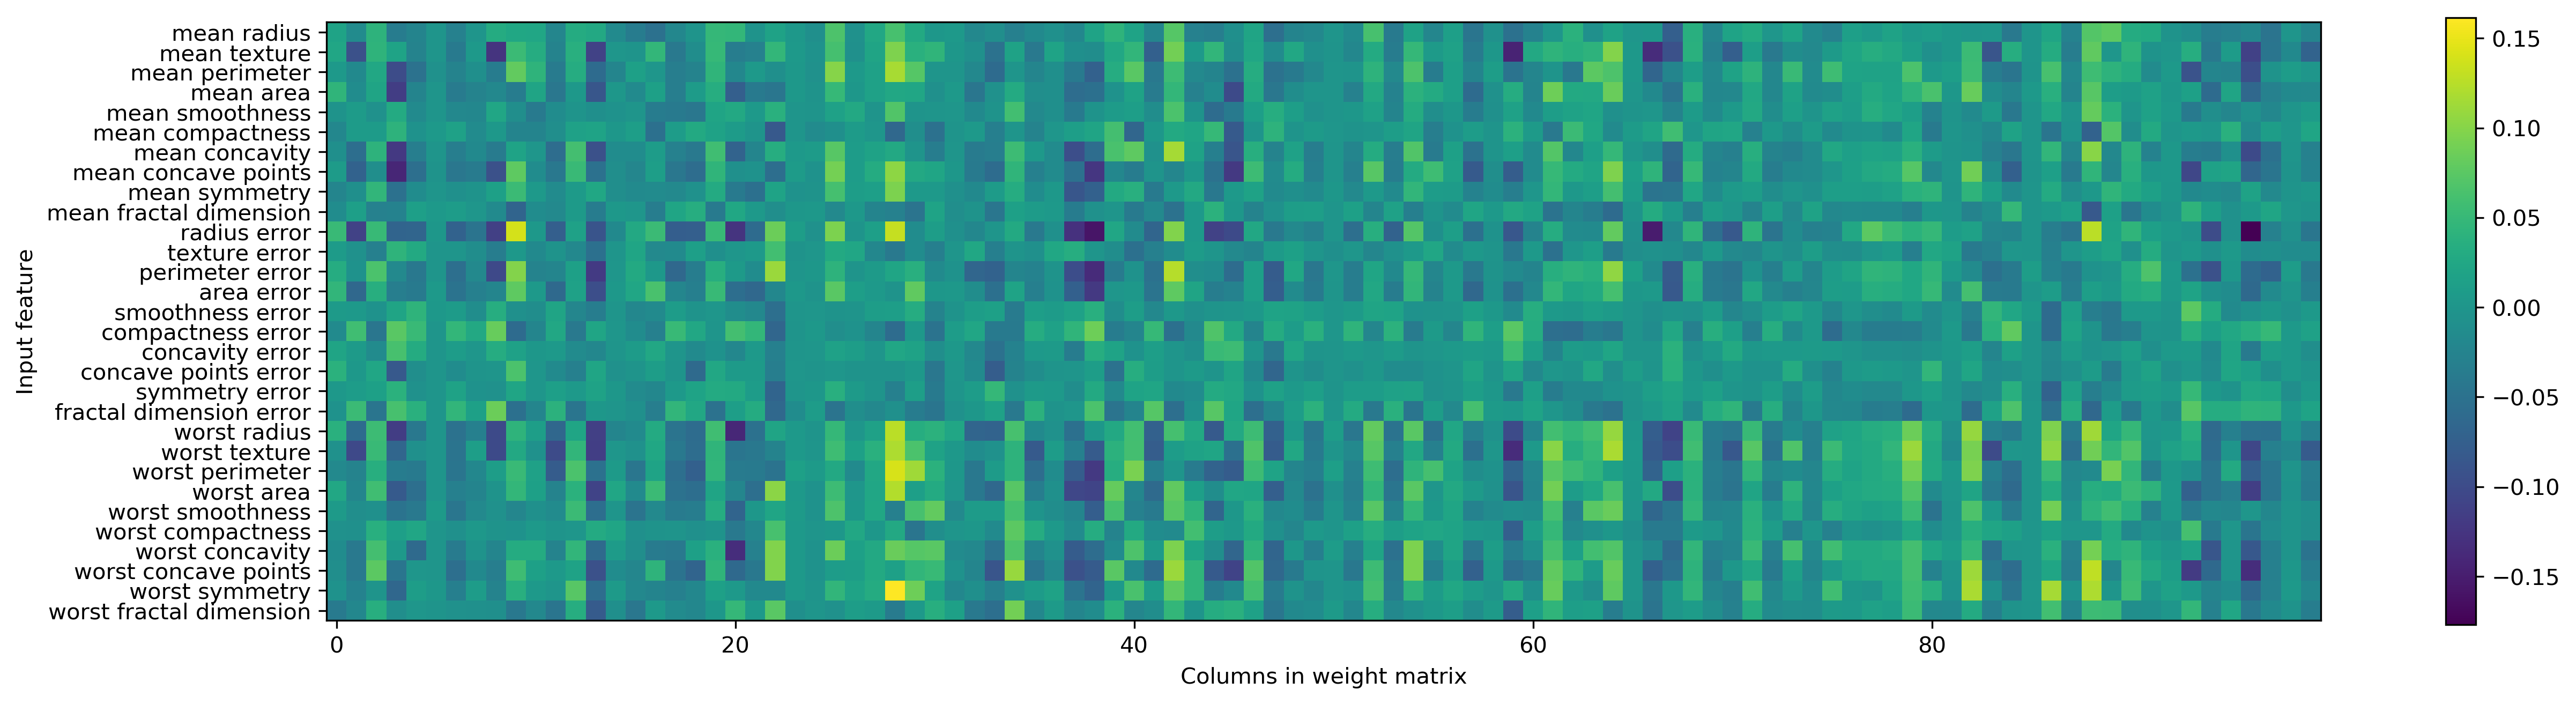

In [152]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters
- MLPClassifier의 한계
  - CNN, RNN 등의 복잡한 딥러닝 신경망 구성할 수 없음
  - 이러한 복잡한 딥러닝 신경망 구성은 keras 또는 tensorflow 활용 필요함
- 신경망의 장점
  - 많은 응용에서 최고의 모델로 평가받고 있음
  - 대량의 데이터에 내재된 정보를 잡아내면서 복잡한 모델 구성 가능
  - 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 최고의 성능 발휘 가능
- 신견망의 단점
  - 학습 시간이 오래 걸림
  - 데이터 전처리 중요
    - 모든 특성이 동일한 범위를 지닌 데이터에 잘 작동
#### Estimating complexity in neural networks

### 2.4 Uncertainty estimates from classifiers

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

print("Data shape: {}".format(X.shape))
print("Target shape: {}".format(y.shape))

# we rename the classes "blue" and "red" for illustration bpurposes:
y_named = np.array(["blue", "red"])[y]
print("Named Target shape: {}".format(y_named.shape))
print(y[0], y_named[0])
print(y[1], y_named[1])
print(y[2], y_named[2])

Data shape: (100, 2)
Target shape: (100,)
Named Target shape: (100,)
1 red
1 red
0 blue


In [157]:
# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

#### 2.4.1 The Decision Function
- decision_function 반환값
  - 주어진 데이터 포인트 샘플당 하나의 실수값 반환
  - 주어진 데이터 포인트가 양성 클래스인 1에 속한다고 믿는 정도
  - 반환값의 부호
    - 양수: 양성 클래스 (1)
    - 음수: 음성 클래스 (0)

In [122]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [123]:
# show the first few entries of decision_function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.136 -1.702 -3.951 -3.626  4.29   3.662]


In [124]:
print("Thresholded decision function:\n{}".format(gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [159]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)

# use 0 and 1 as indices into classes_
print(gbrt.classes_)
pred = gbrt.classes_[greater_zero]

# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

['blue' 'red']
pred is equal to predictions: True


In [126]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


- 왼쪽 그래프: 결정 경계
- 오른쪽 그래프: decision_function의 값을 색으로 표현

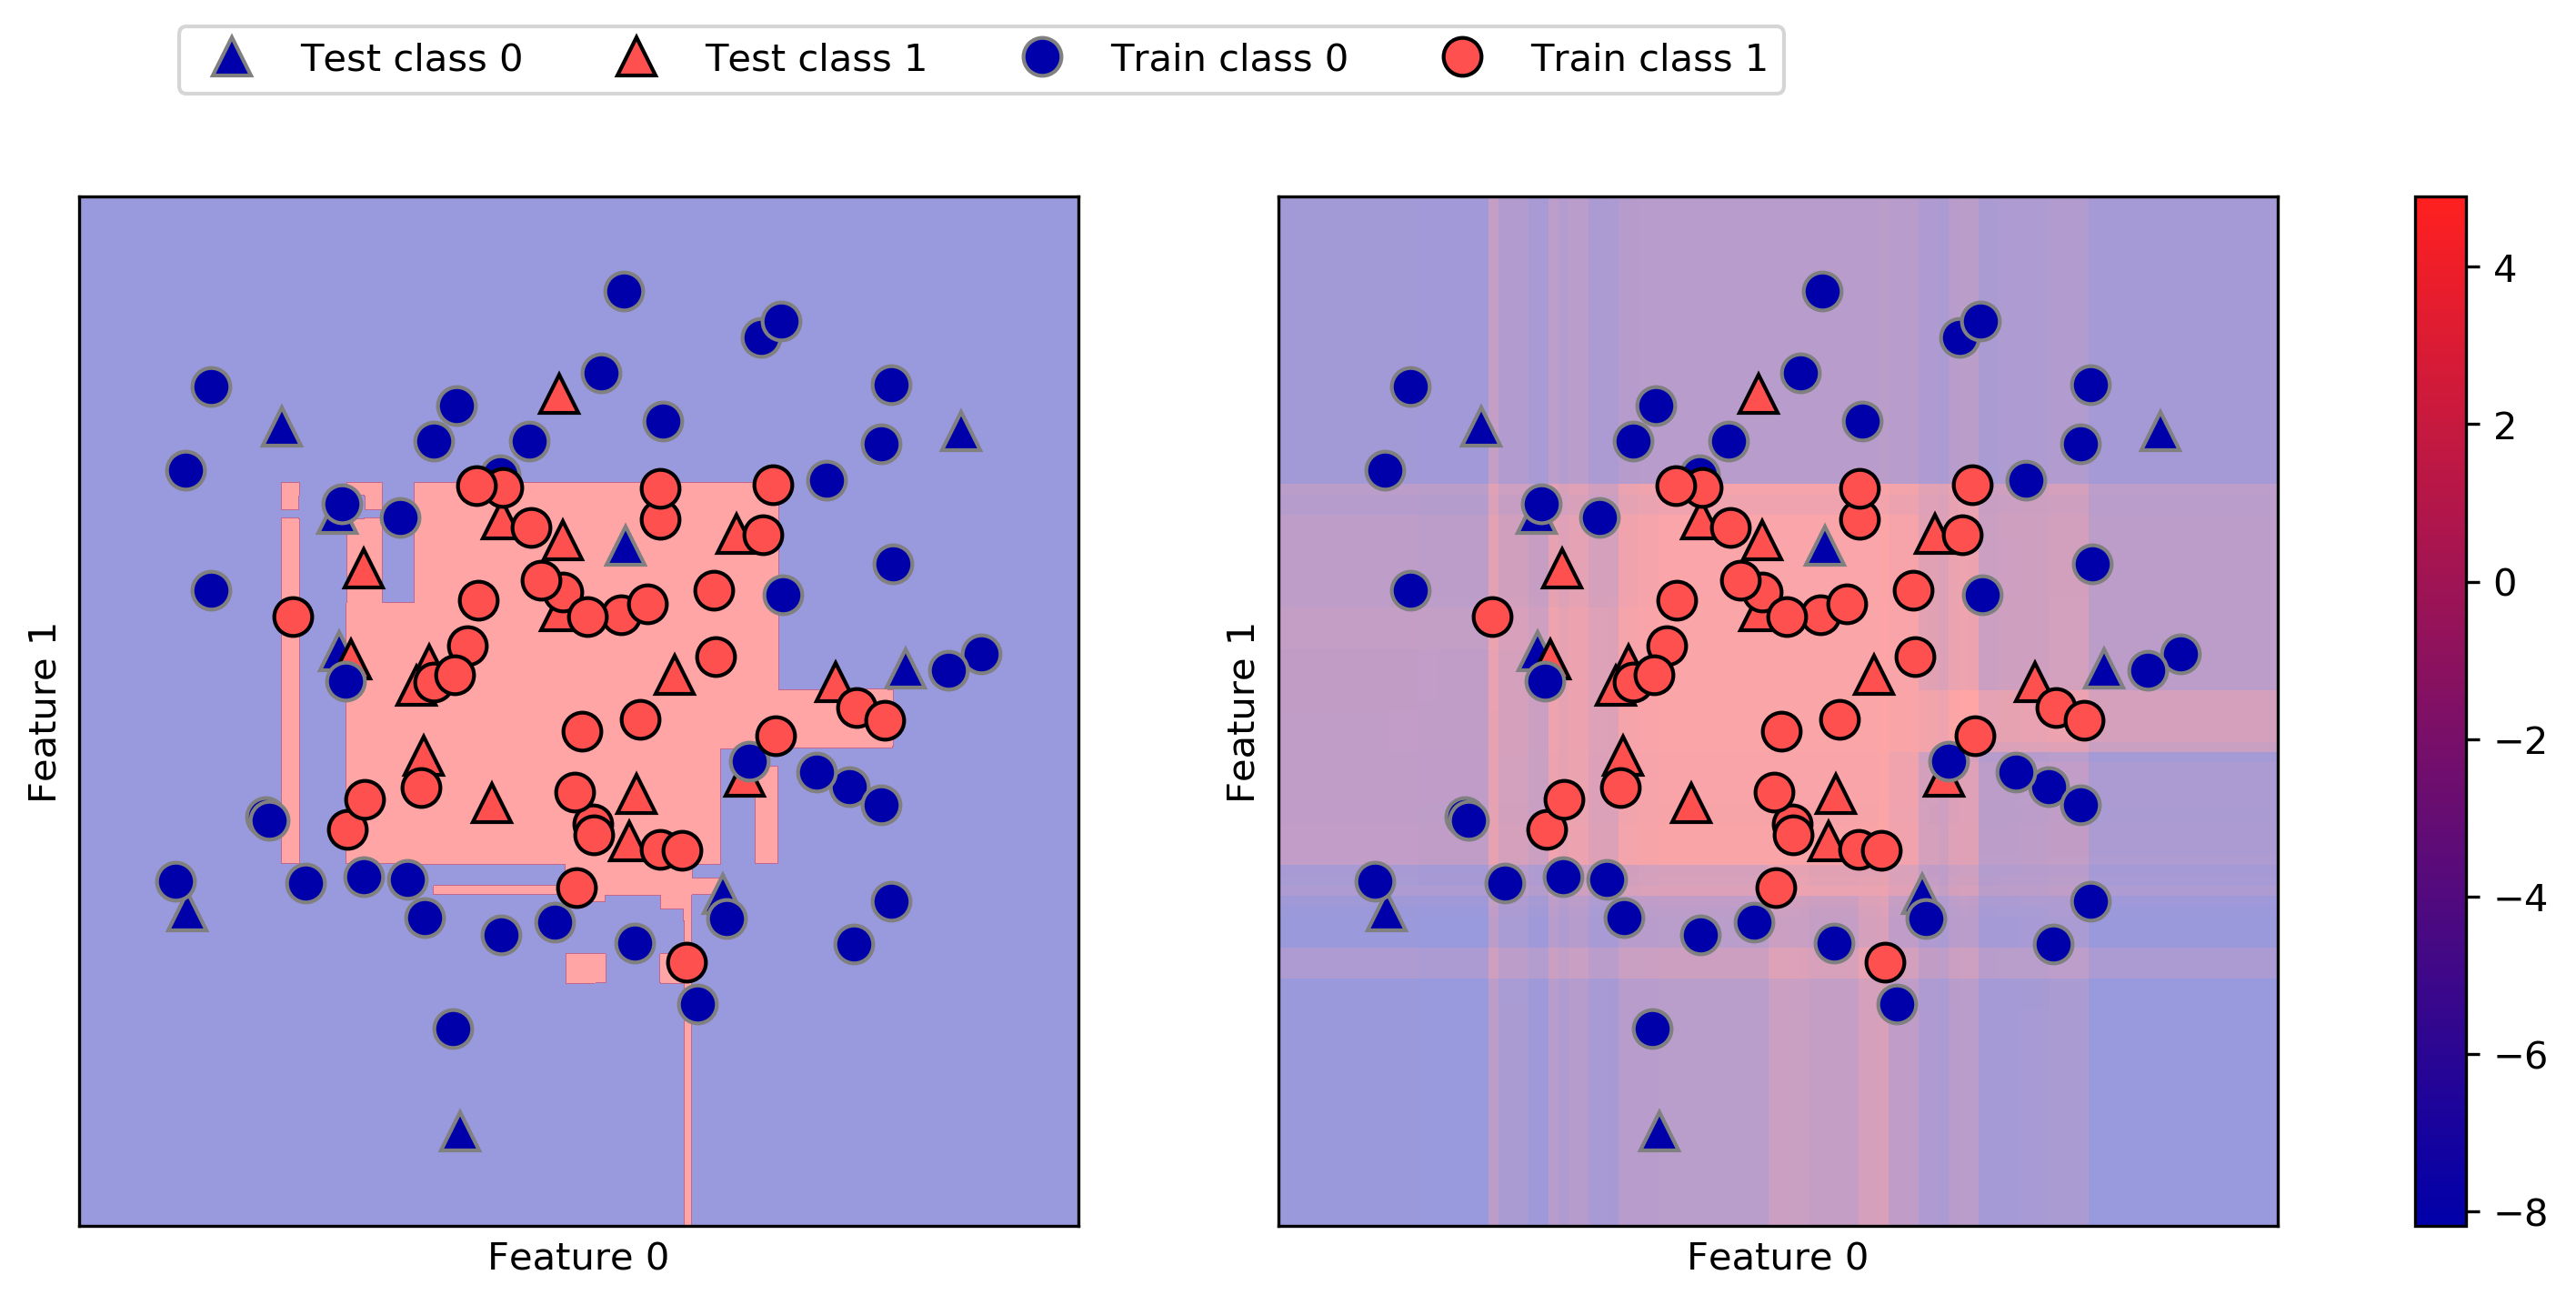

In [160]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

#### 2.4.2 Predicting Probabilities
- predict_proba
  - 각 분류 클래스에 대한 확률값 반환
  - 반환값의 shape는 항상 (n_samples, 2)
    - 각 샘플당 첫번째 원소는 첫번째 클래스의 예측 확률, 두번째 원소는 두번째 클래스의 예측 확률
    - 두 원소 값의 합은 항상 1.0
  - overfitting 된 모델에서는 각 클래스에 대한 예측 확률이 높은 편 --> 즉, 예측 확신이 강함
  - 일반적으로 복잡도가 낮은 모델은 예측에 대해 불확실성이 높고 예측 확률이 낮은 편
- 불확실의 정도와 모델의 정확도가 동일 --> 보정(Calibration)이 잘 되었다고 판단
  - 보정이 잘 된 모델에서는 70% 확신을 지닌 예측은 70%의 정확도를 냄

In [163]:
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [164]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[ 0.016  0.984]
 [ 0.846  0.154]
 [ 0.981  0.019]
 [ 0.974  0.026]
 [ 0.014  0.986]
 [ 0.025  0.975]]


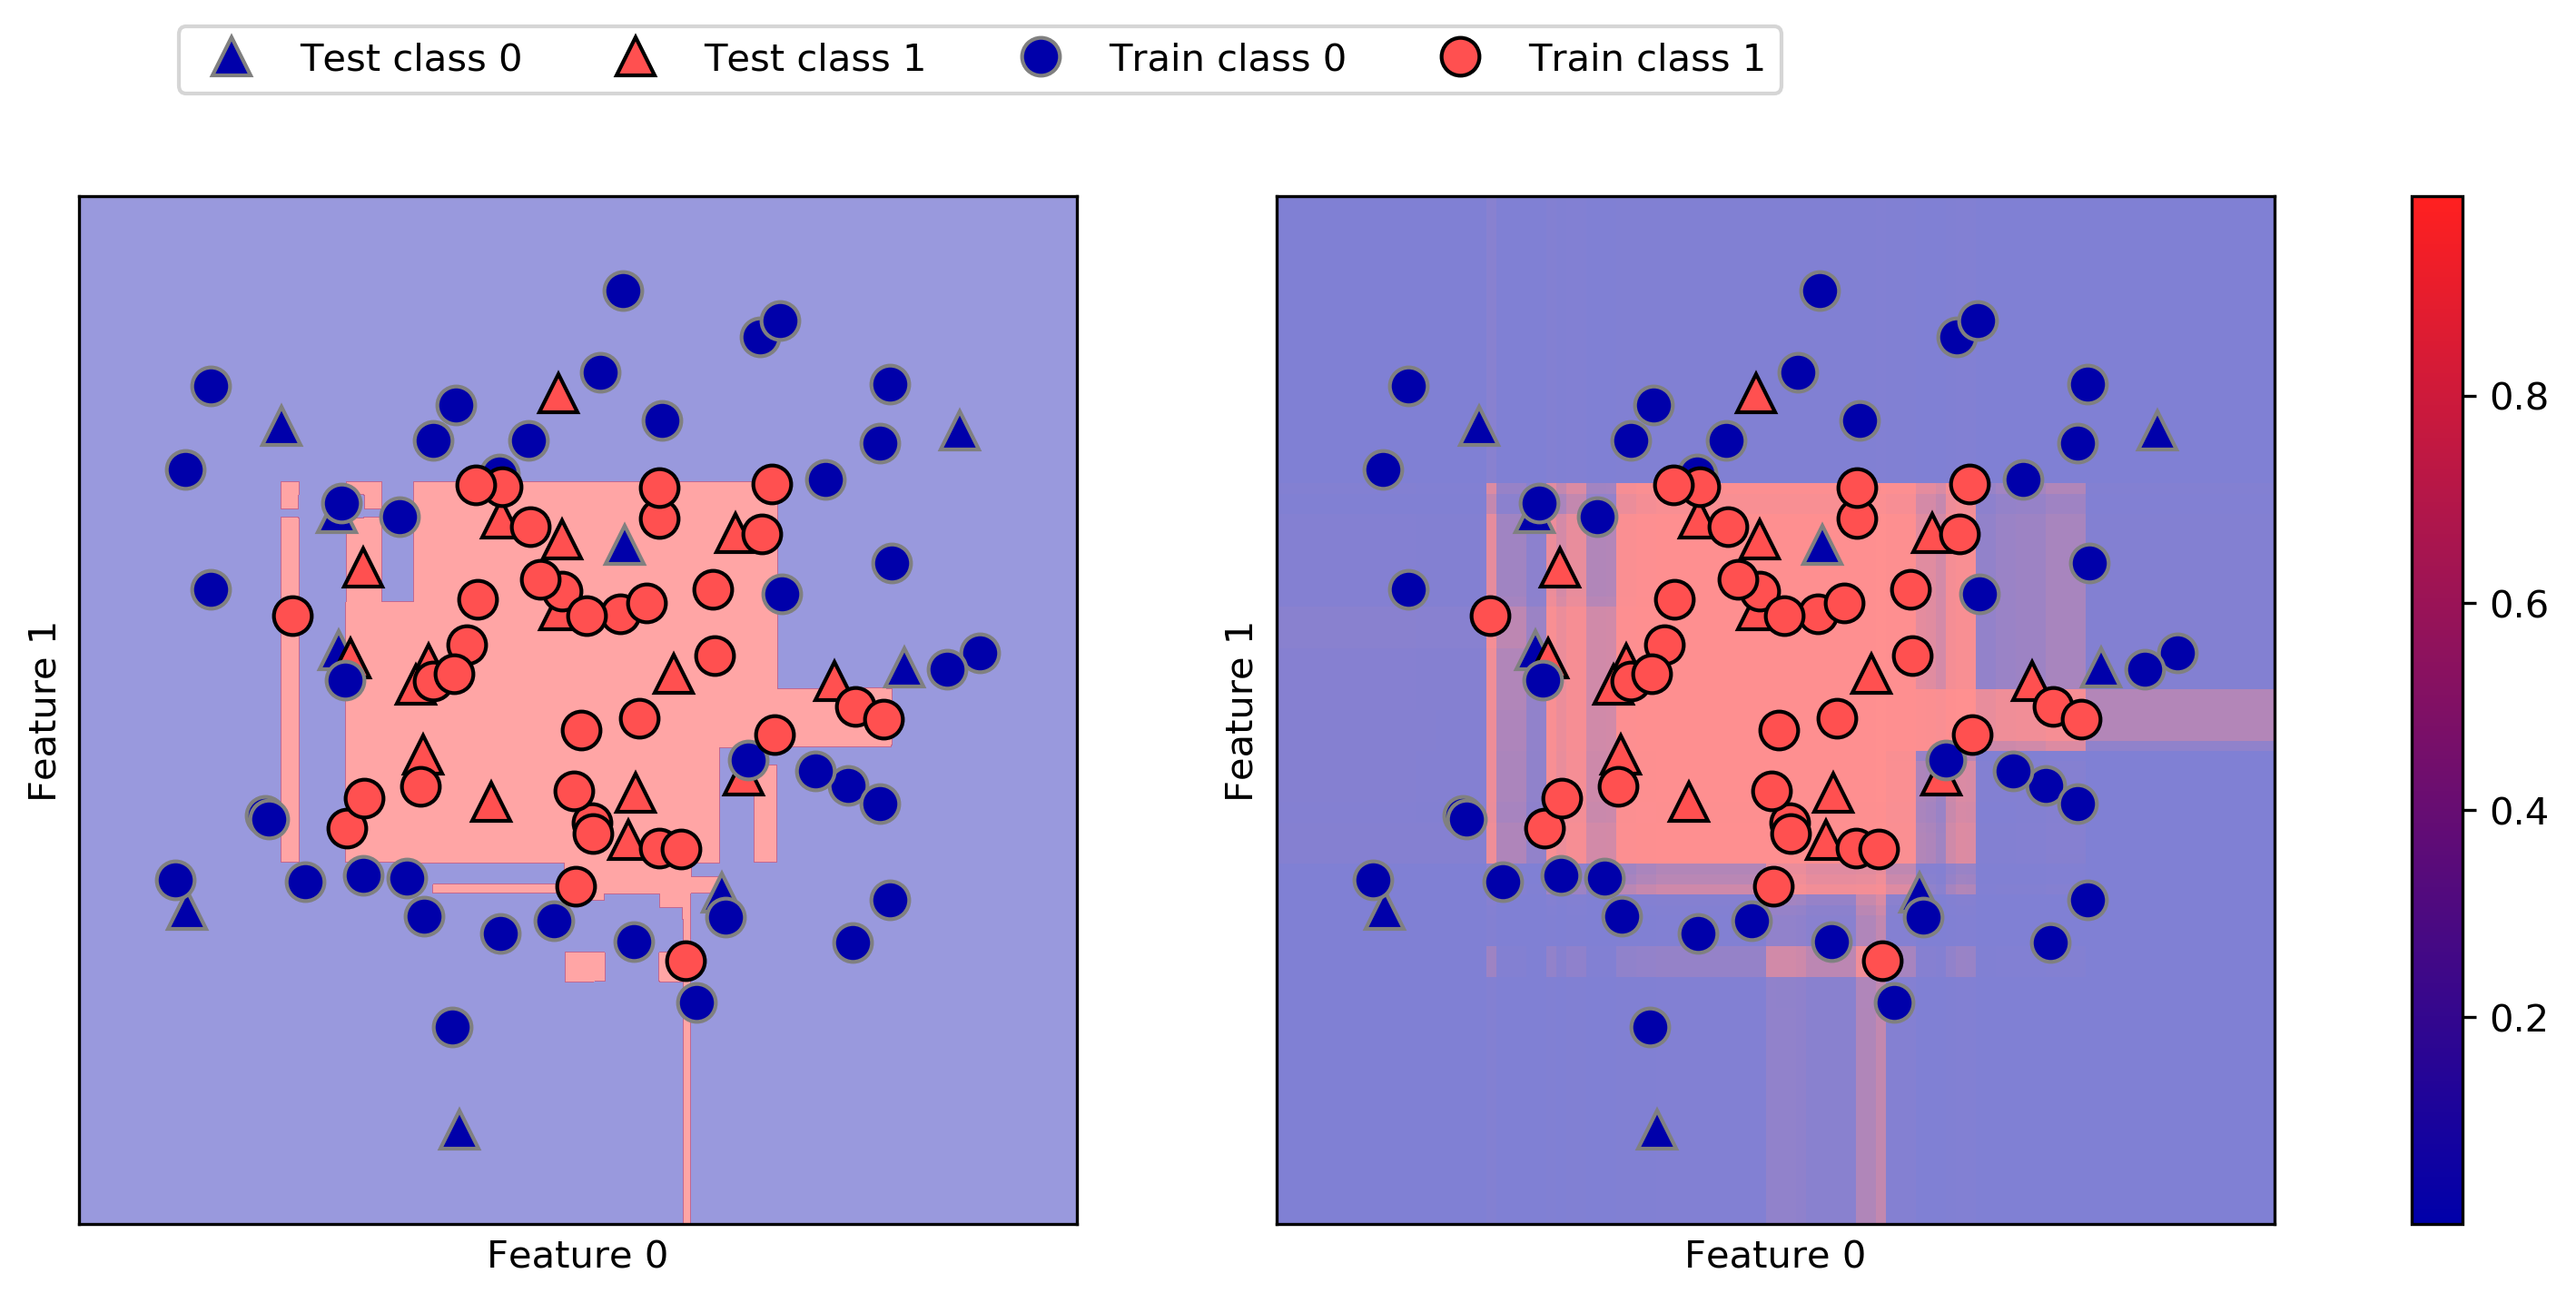

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0", "Train class 1"], ncol=4, loc=(.1, 1.1))

- 많은 모델에 대한 불확실성 추정 도표
  - http://bit.ly/2cqCYx6

![classifier_comparison](images/classifier_comparison.png)

#### 2.4.3 Uncertainty in multi-class classification

In [167]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [168]:
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.529  1.466 -0.504]
 [ 1.512 -0.496 -0.503]
 [-0.524 -0.468  1.52 ]
 [-0.529  1.466 -0.504]
 [-0.531  1.282  0.215]
 [ 1.512 -0.496 -0.503]]


In [169]:
print("Argmax of decision function:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [170]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[ 0.107  0.784  0.109]
 [ 0.789  0.106  0.105]
 [ 0.102  0.108  0.789]
 [ 0.107  0.784  0.109]
 [ 0.108  0.663  0.228]
 [ 0.789  0.106  0.105]]
Sums: [ 1.  1.  1.  1.  1.  1.]


In [171]:
print("Argmax of predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [172]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(X_test)[:10]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(logreg.classes_[argmax_dec_func][:10]))

unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


### 2.5 Summary and Outlook
- 최근접 이웃
- 선형 모델
- 나이브 베이즈
- 결정 트리
- 랜덤 포레스트
- 그레디언트 부스팅 결정 트리
- 서포트 벡터 머신
- 신경망